## Breast Cancer Wisconsin (Prognostic) Data Set

Data From: UCI Machine Learning Repository
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.names

The goal of this notebook is to predict the reoccurence of brewast cancer in patients

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Loading data into a pandas dataframe

In [66]:
df = pd.read_csv('data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

#### Exploratory Data Analys

The goals of the EDA section 

1. Understanding the data
    - df.info()
    - df.describe()
    - Are there missing values?
    - are there duplicates?
2. Visualize Distributions
    - Seeing if features are skewed, normally distributed
    - Are there outliers
    - do we need scaling?
3. Target Feature analysis
    - Are the classes balanced

In [67]:
df.shape

(569, 33)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [69]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

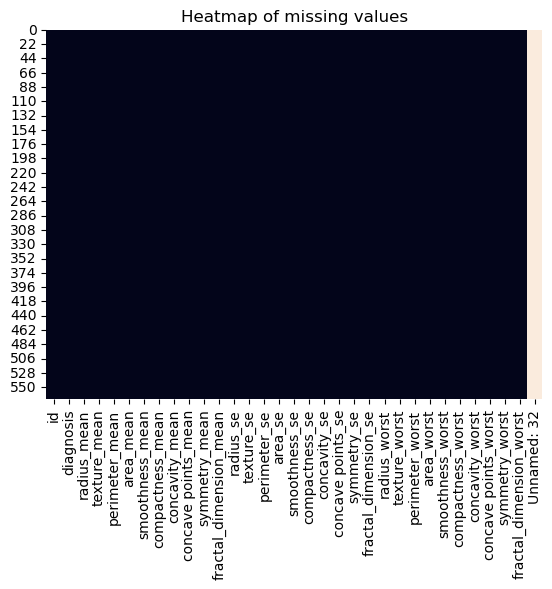

In [70]:
sns.heatmap(df.isna(),cbar = False)
plt.title("Heatmap of missing values")
plt.show()

So as we can see only the Unamed Feature contains missing values, since all of its values are NaN we will simply drop this feature

In [71]:
df = df.drop(['Unnamed: 32','id'], axis = 1)

In [72]:
df.duplicated().any()

False

Now lets seperate our df into numerical and categorical feature for further analysis

In [73]:
num_df = df.select_dtypes(include=['number'])
cat_df = df.select_dtypes(include=['object','category'])

In [74]:
num_df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [75]:
cat_df.columns

Index(['diagnosis'], dtype='object')

So as we can see we only have one categorical feature, meaning its best we just encode this feature so we can deal with only numerical features

In [76]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [77]:
df['diagnosis'] = cat_df['diagnosis'].map(lambda x: 1 if x == 'M' else 0 )

In [78]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

Lets see how the classes balance out

In [79]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

lets begin with numerical feature analysis, specifically looking at the skew and kurtosis of the features

In [80]:
for col in num_df.columns:
        print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(num_df[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(num_df[col].kurt())  
         )

radius_mean     Skewness: 00.94     Kurtosis: 000.85
texture_mean    Skewness: 00.65     Kurtosis: 000.76
perimeter_mean  Skewness: 00.99     Kurtosis: 000.97
area_mean       Skewness: 01.65     Kurtosis: 003.65
smoothness_mean Skewness: 00.46     Kurtosis: 000.86
compactness_mean Skewness: 01.19     Kurtosis: 001.65
concavity_mean  Skewness: 01.40     Kurtosis: 002.00
concave points_mean Skewness: 01.17     Kurtosis: 001.07
symmetry_mean   Skewness: 00.73     Kurtosis: 001.29
fractal_dimension_mean Skewness: 01.30     Kurtosis: 003.01
radius_se       Skewness: 03.09     Kurtosis: 017.69
texture_se      Skewness: 01.65     Kurtosis: 005.35
perimeter_se    Skewness: 03.44     Kurtosis: 021.40
area_se         Skewness: 05.45     Kurtosis: 049.21
smoothness_se   Skewness: 02.31     Kurtosis: 010.47
compactness_se  Skewness: 01.90     Kurtosis: 005.11
concavity_se    Skewness: 05.11     Kurtosis: 048.86
concave points_se Skewness: 01.44     Kurtosis: 005.13
symmetry_se     Skewness: 02.20 

In [81]:
def univariate_analysis(df, features):
    for feature in features:
        plt.figure(figsize=(16,12))
    
        plt.subplot(1,3,1)
        sns.histplot(x = feature, data = df,kde=True)
        plt.title(f"Histogram of {feature}")
    
        plt.subplot(1,3,2)
        stats.probplot(df[feature], dist="norm", plot=plt)
        plt.title(f"Probability Plot {feature}")
    
        plt.subplot(1,3,3)
        sns.boxplot(y=feature, data=df)
        plt.title(f"Box plot of {feature}")

    
    
        plt.tight_layout()
        plt.show()

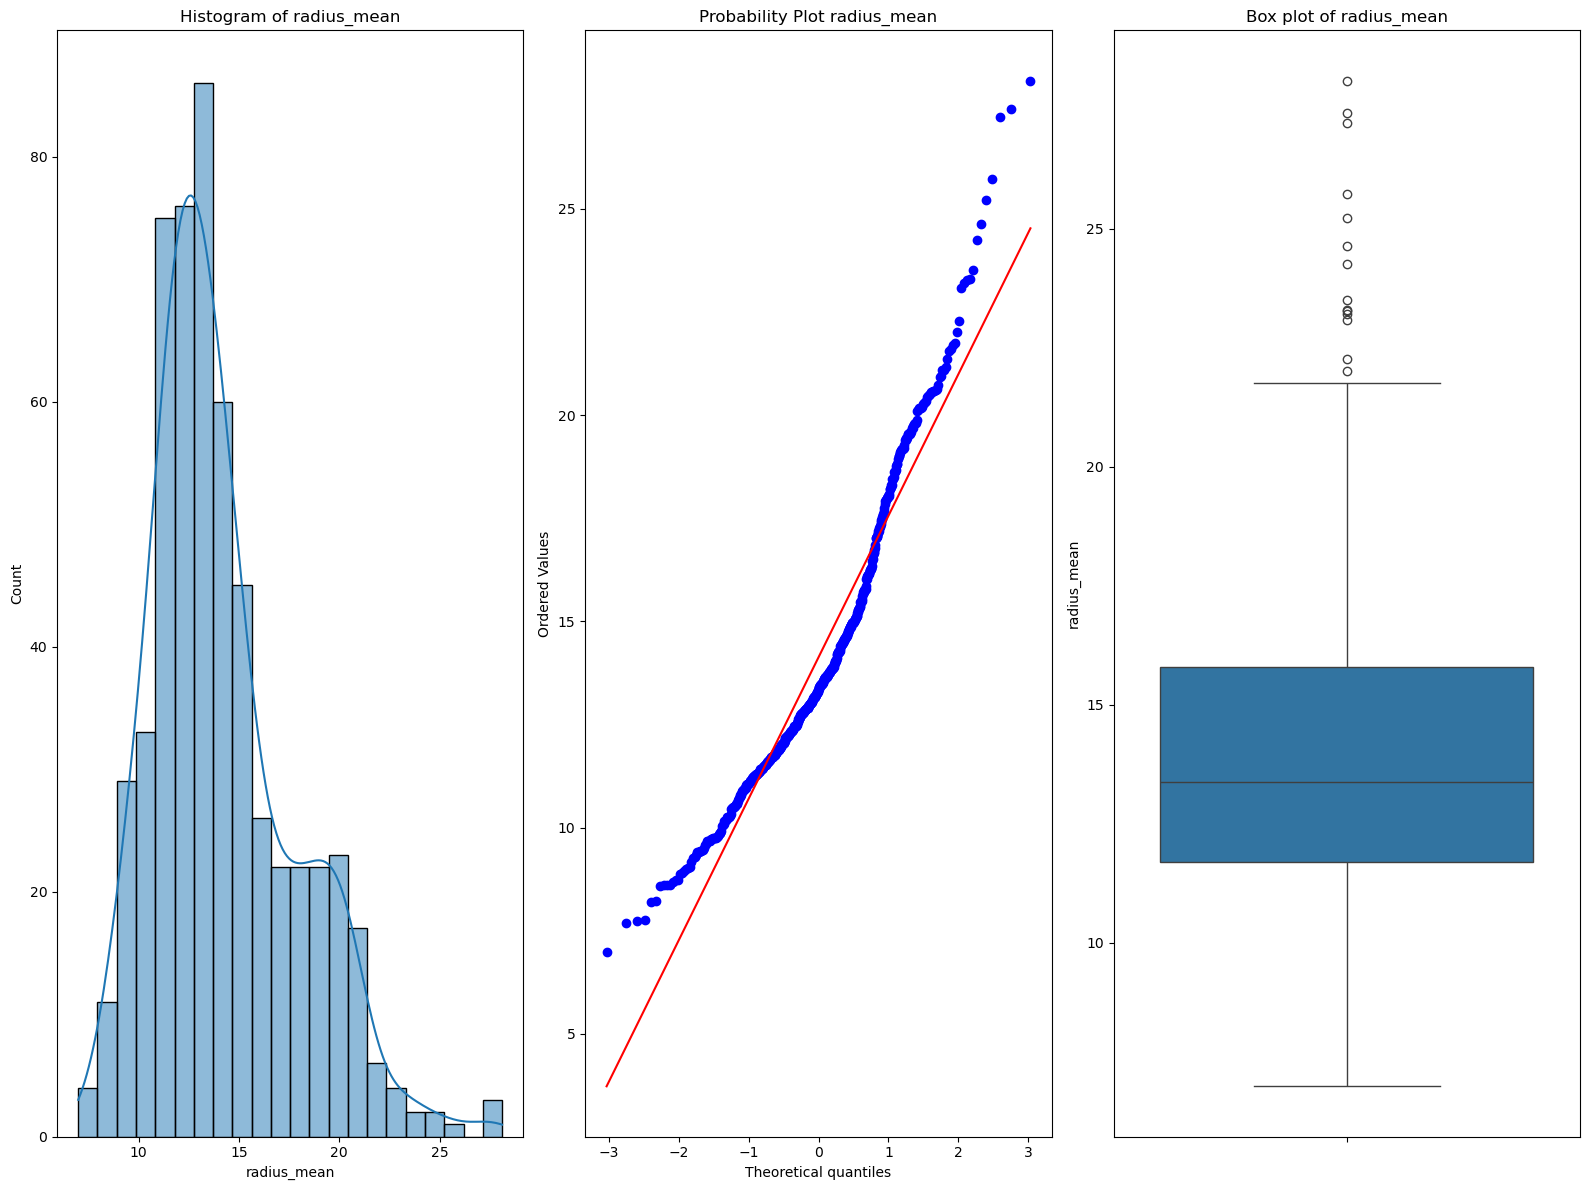

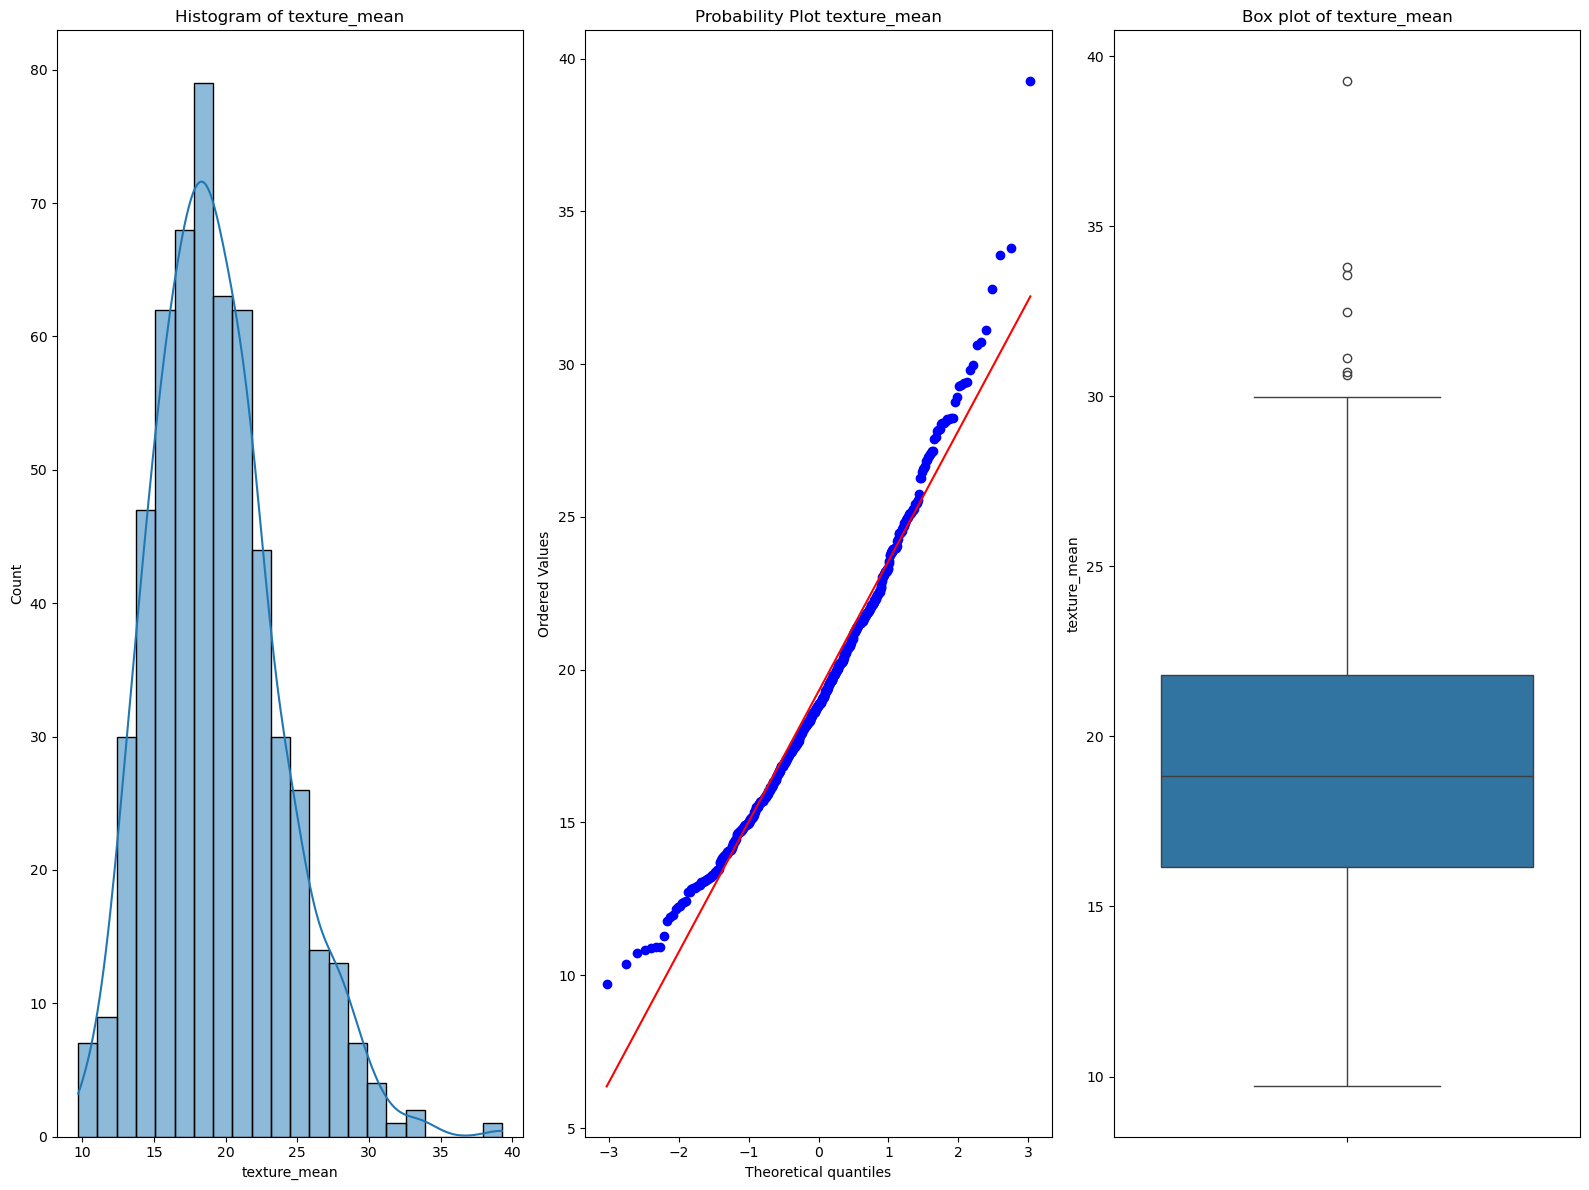

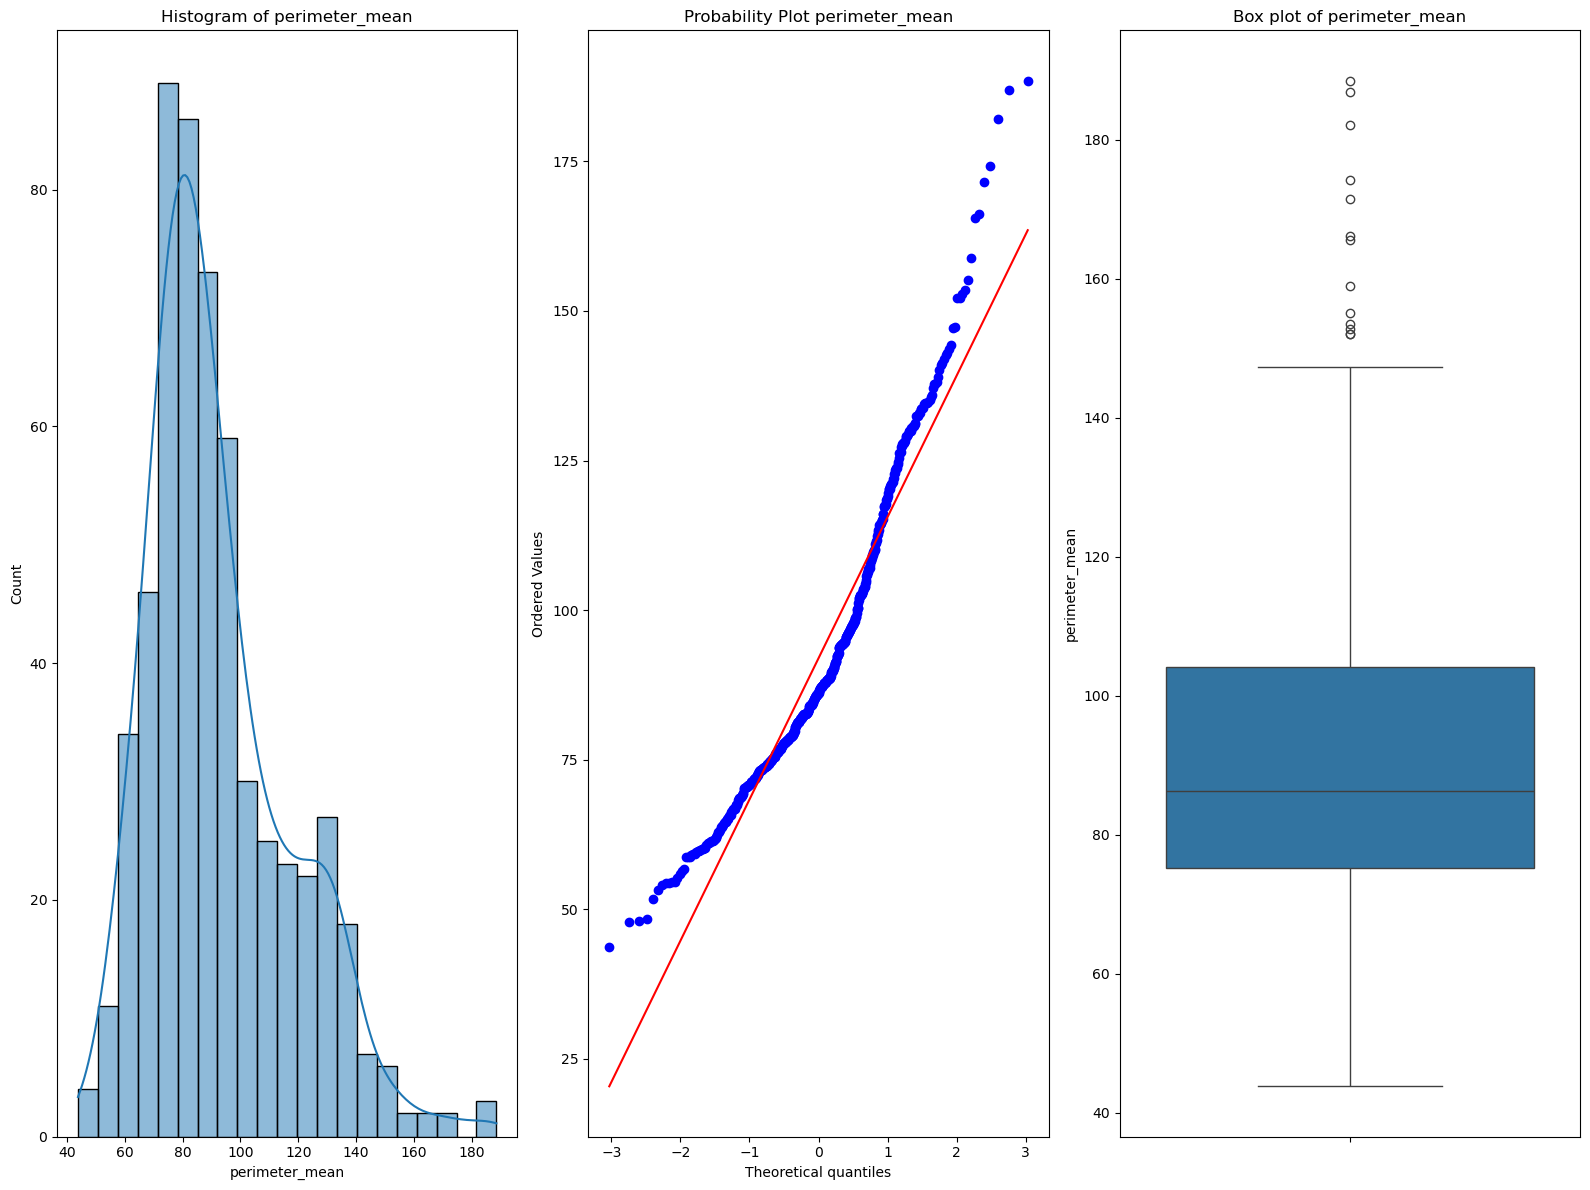

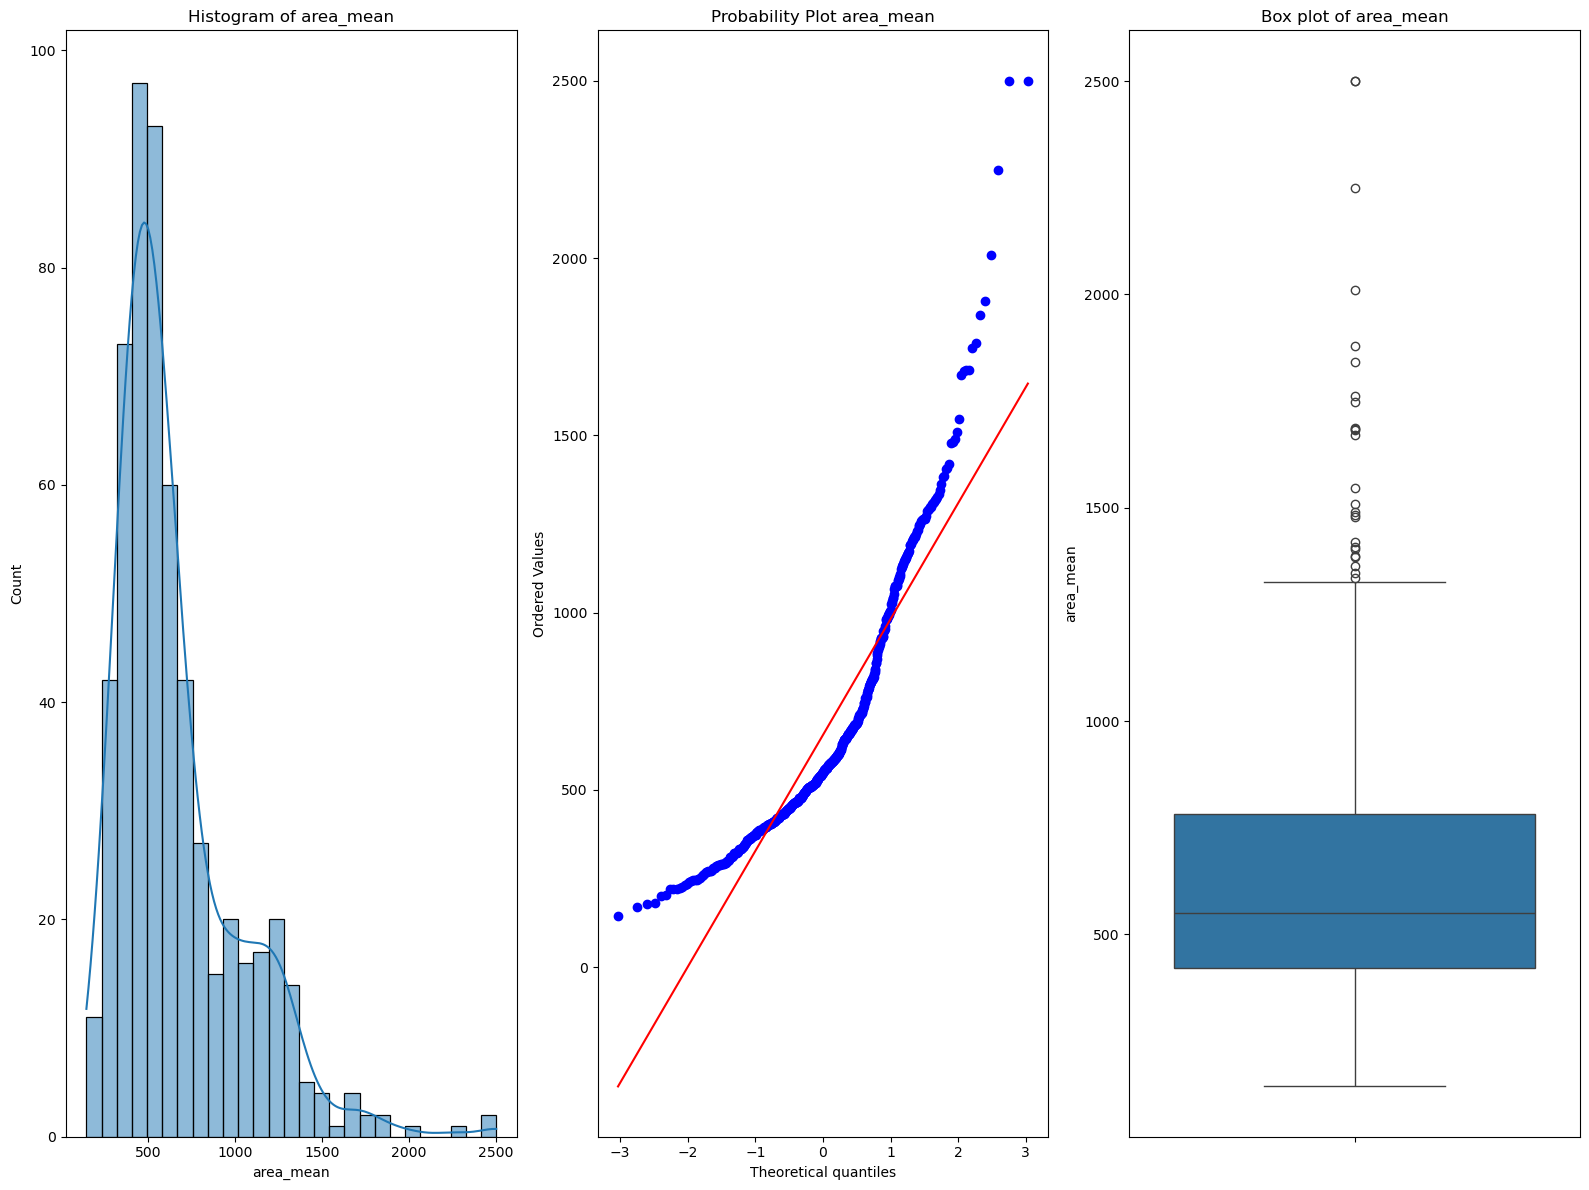

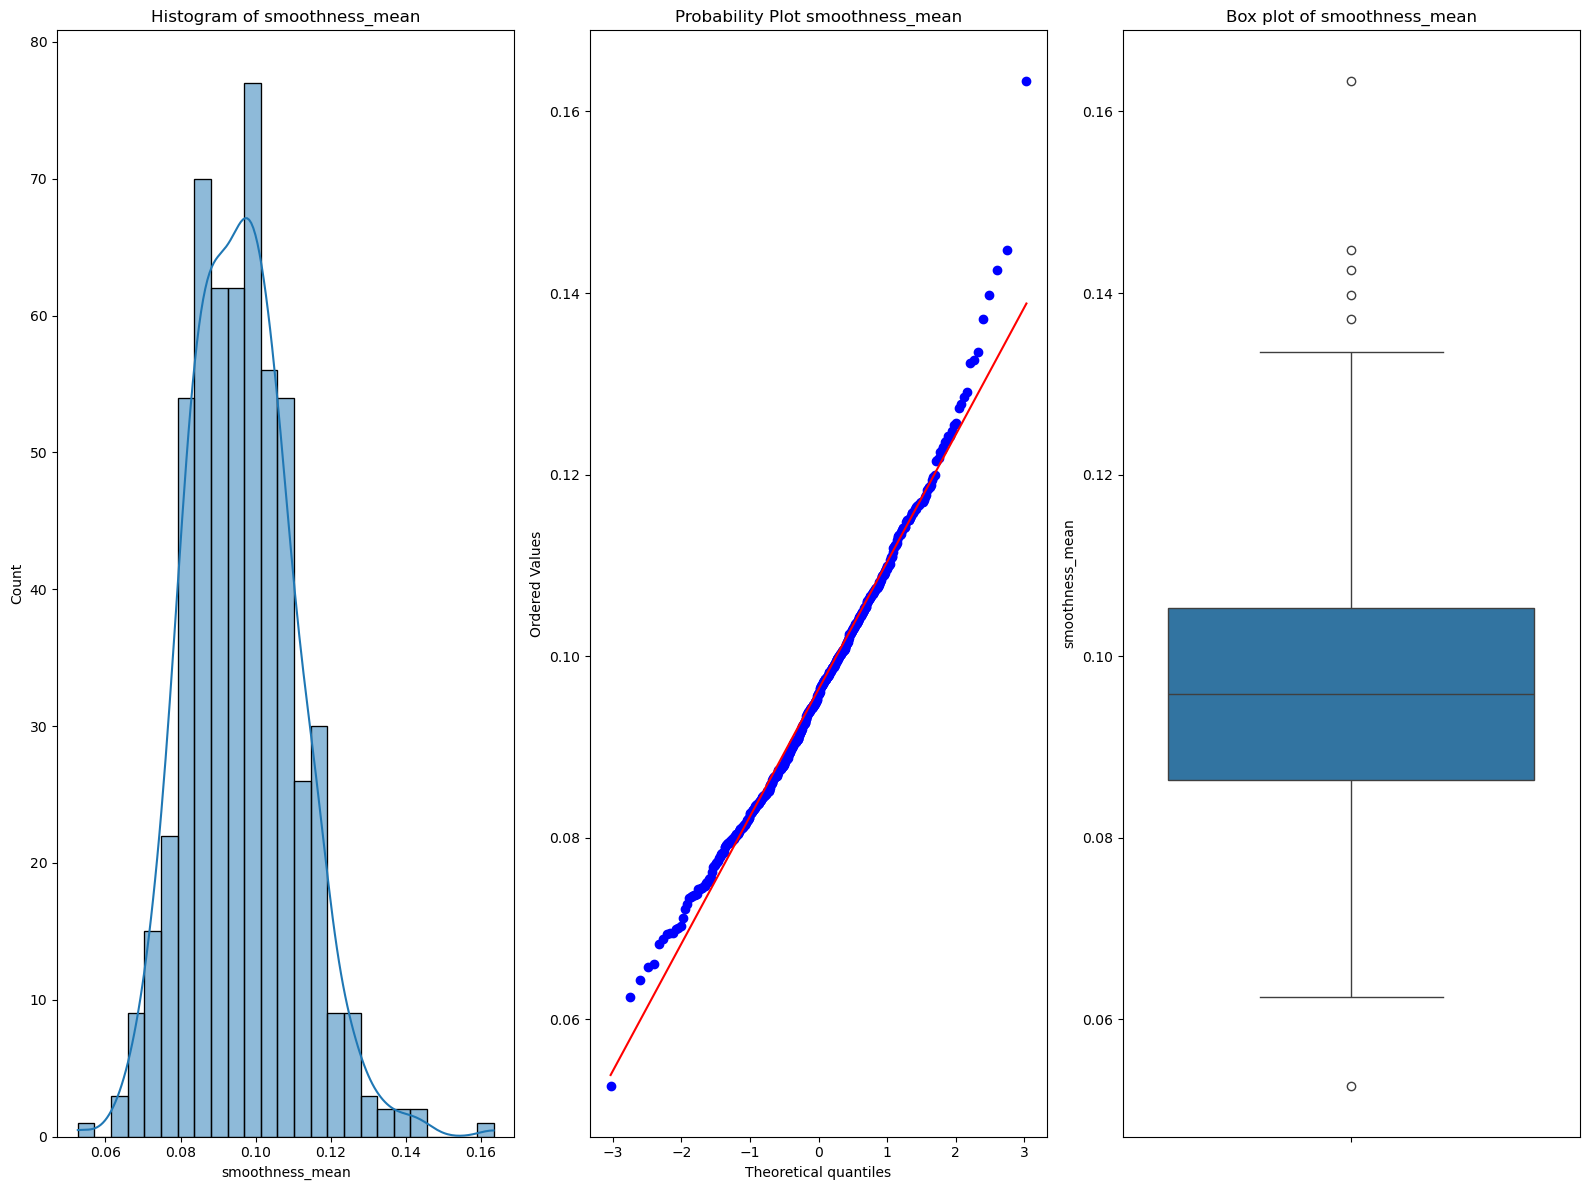

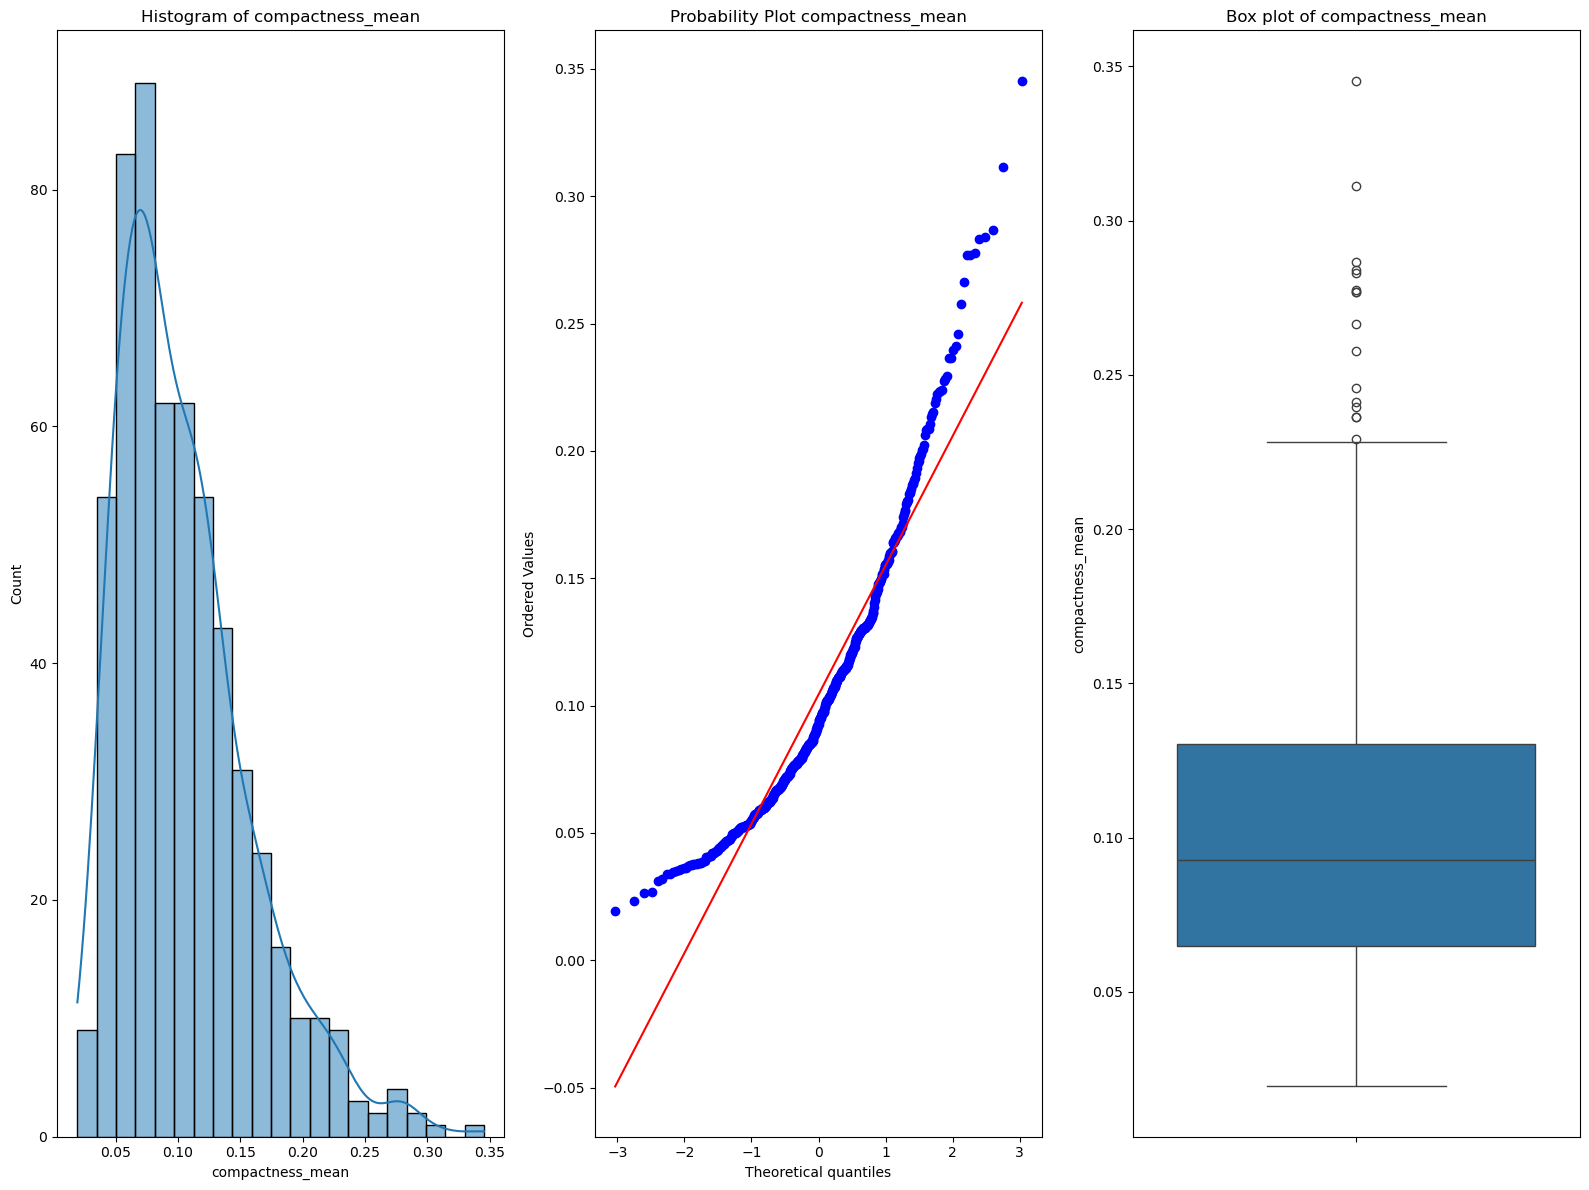

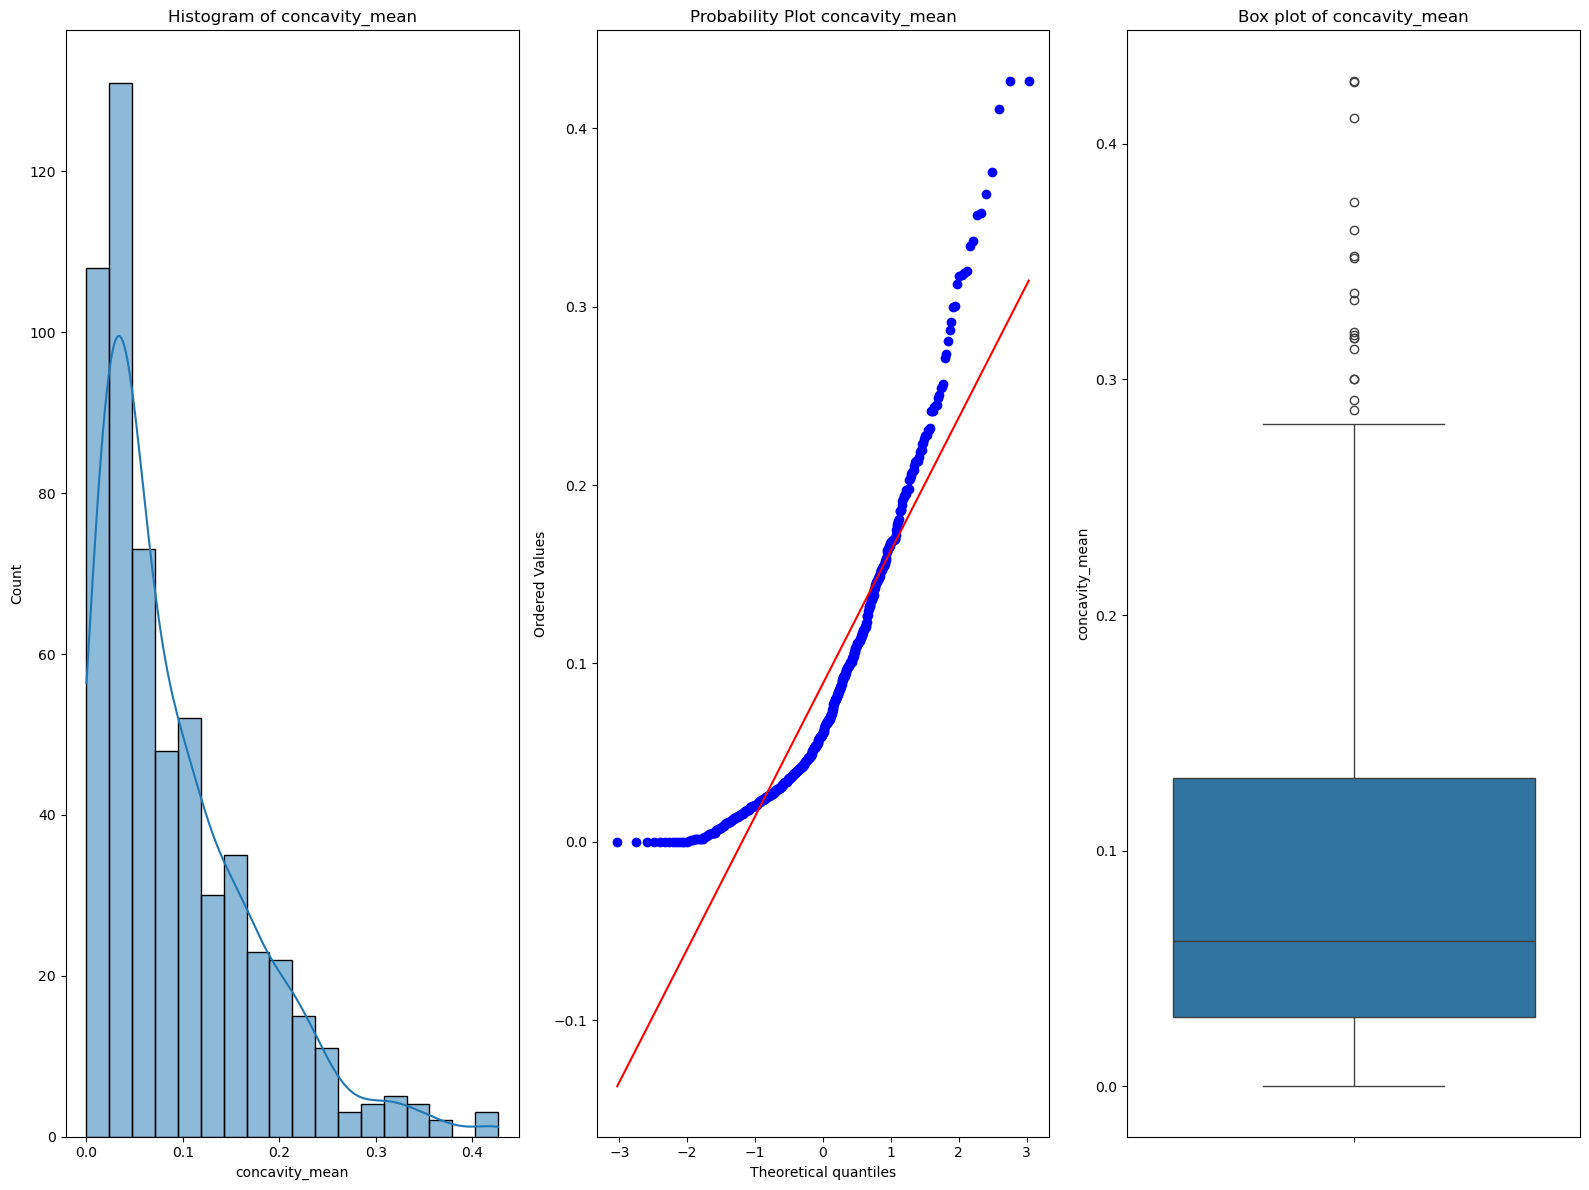

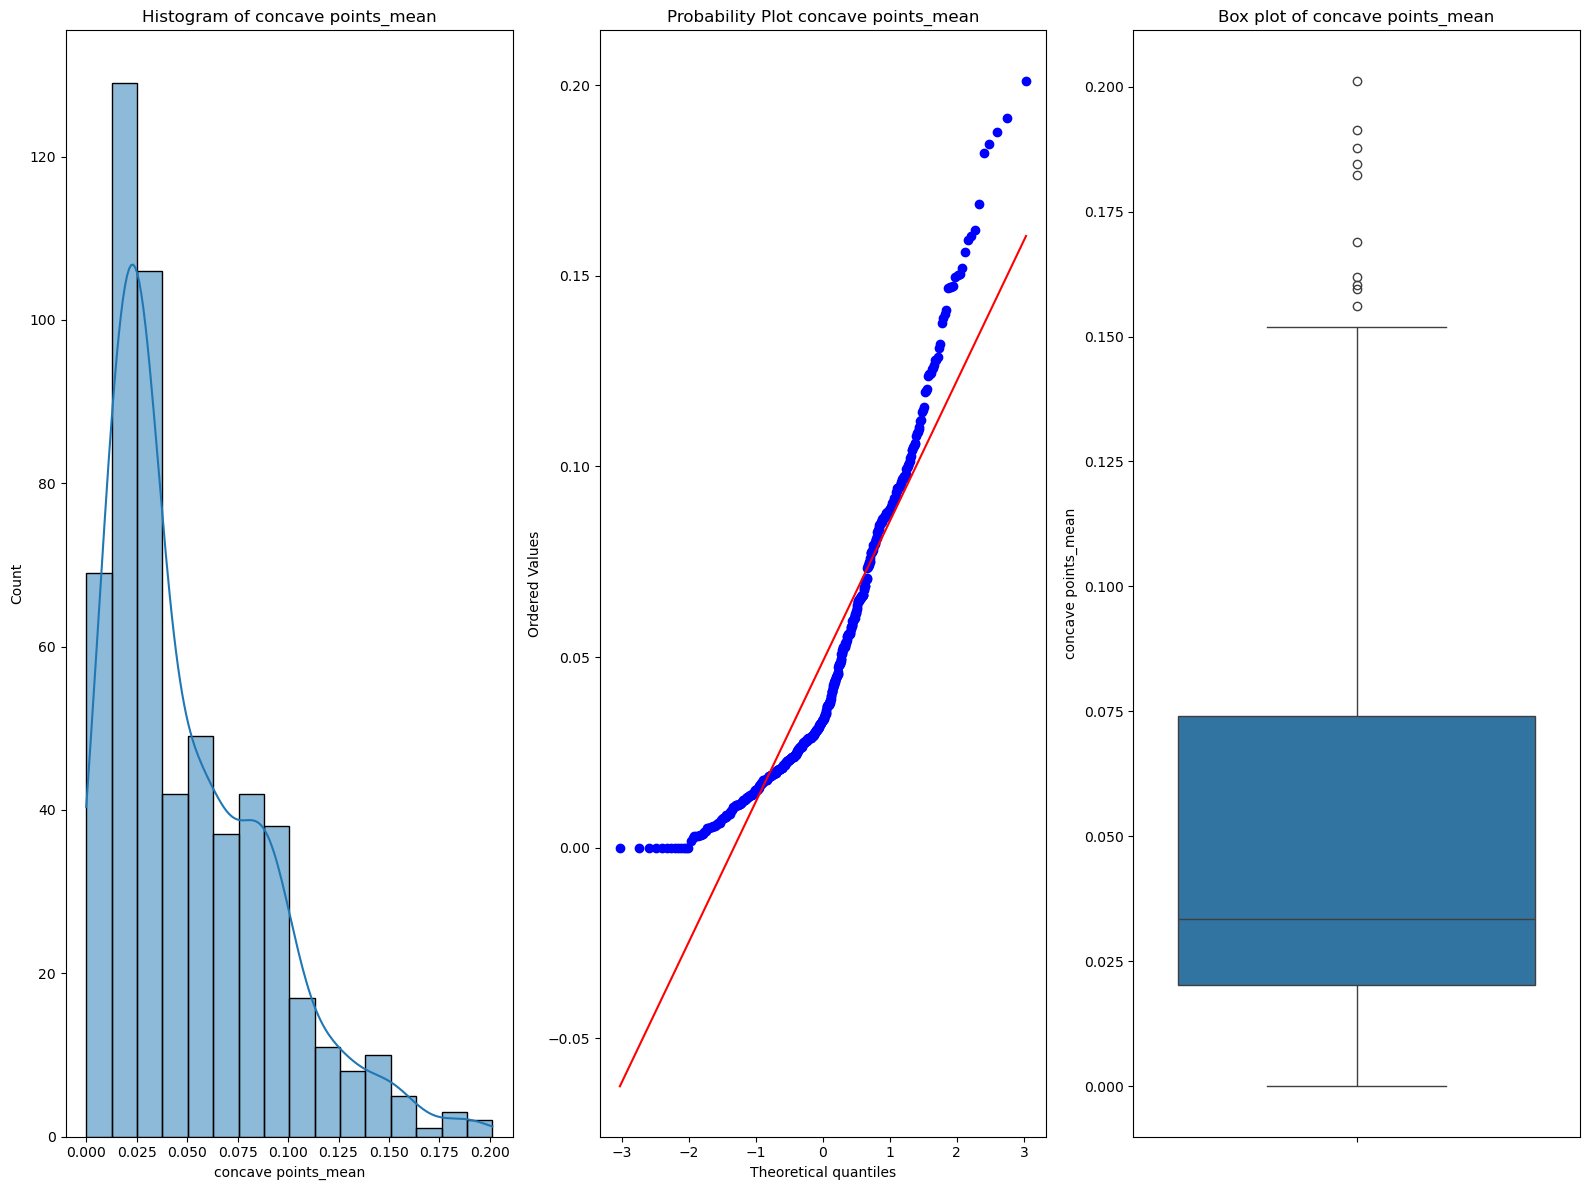

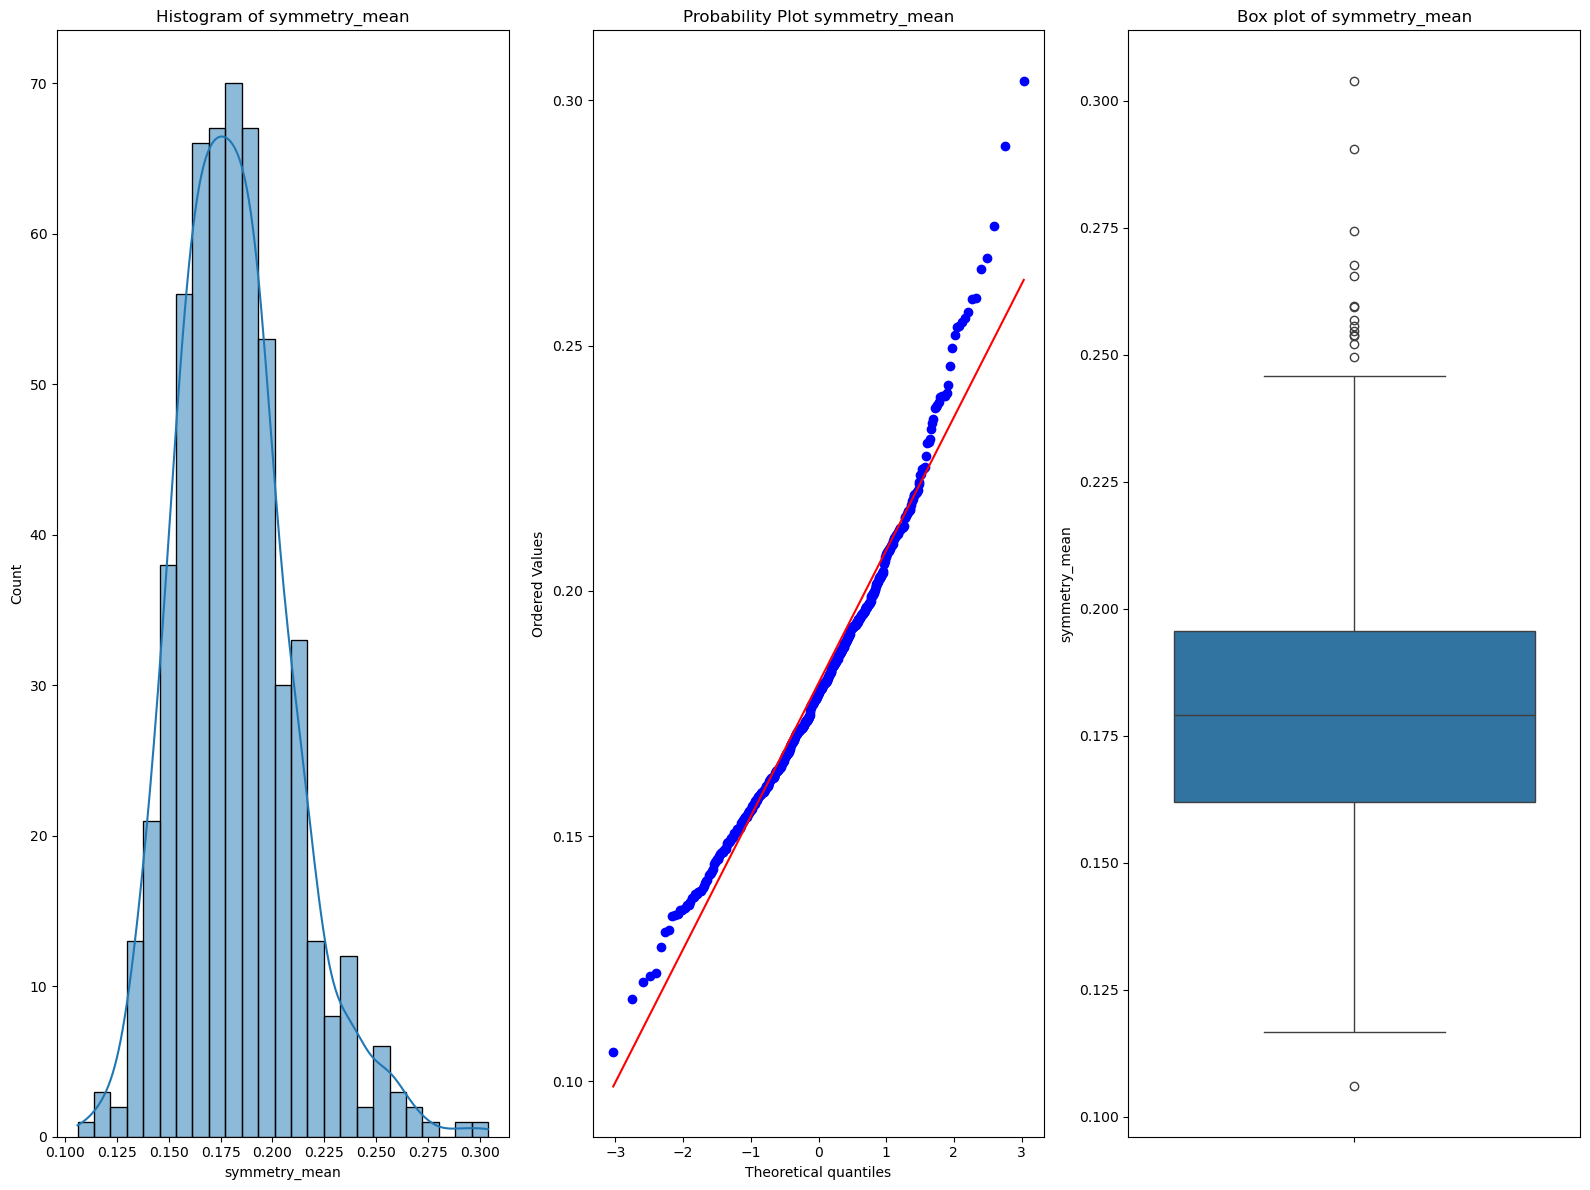

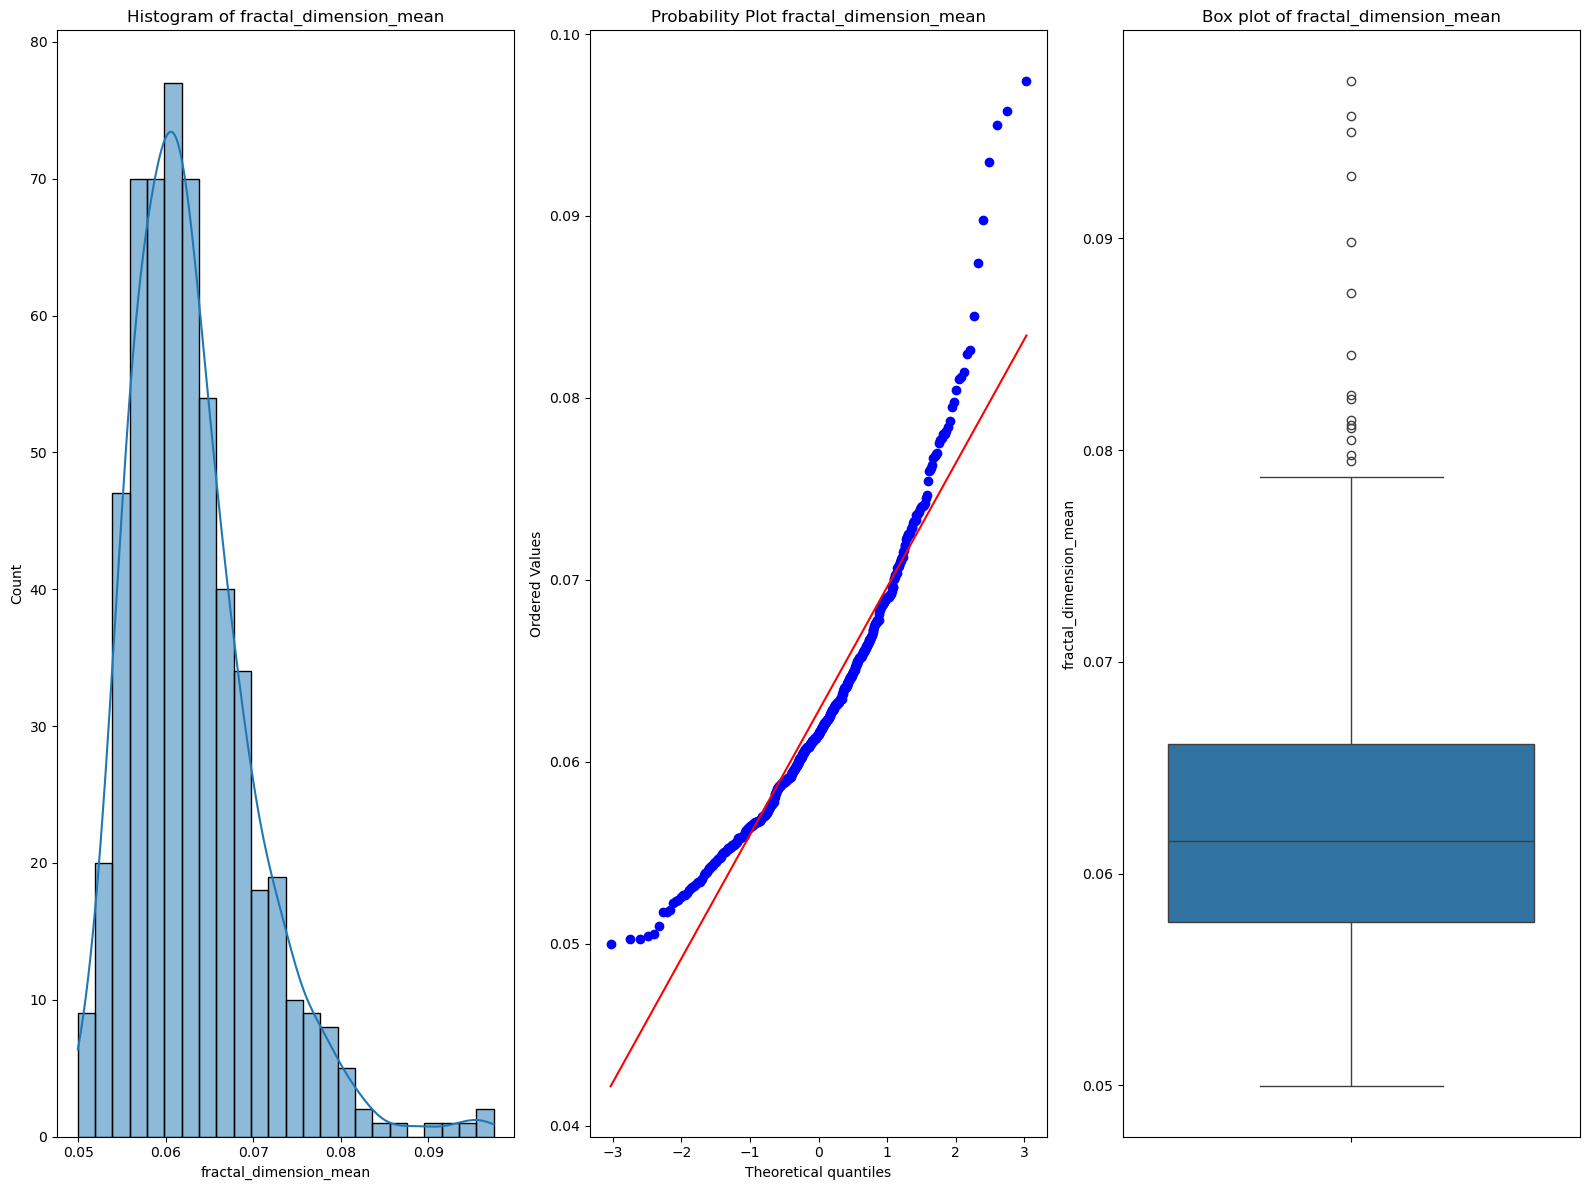

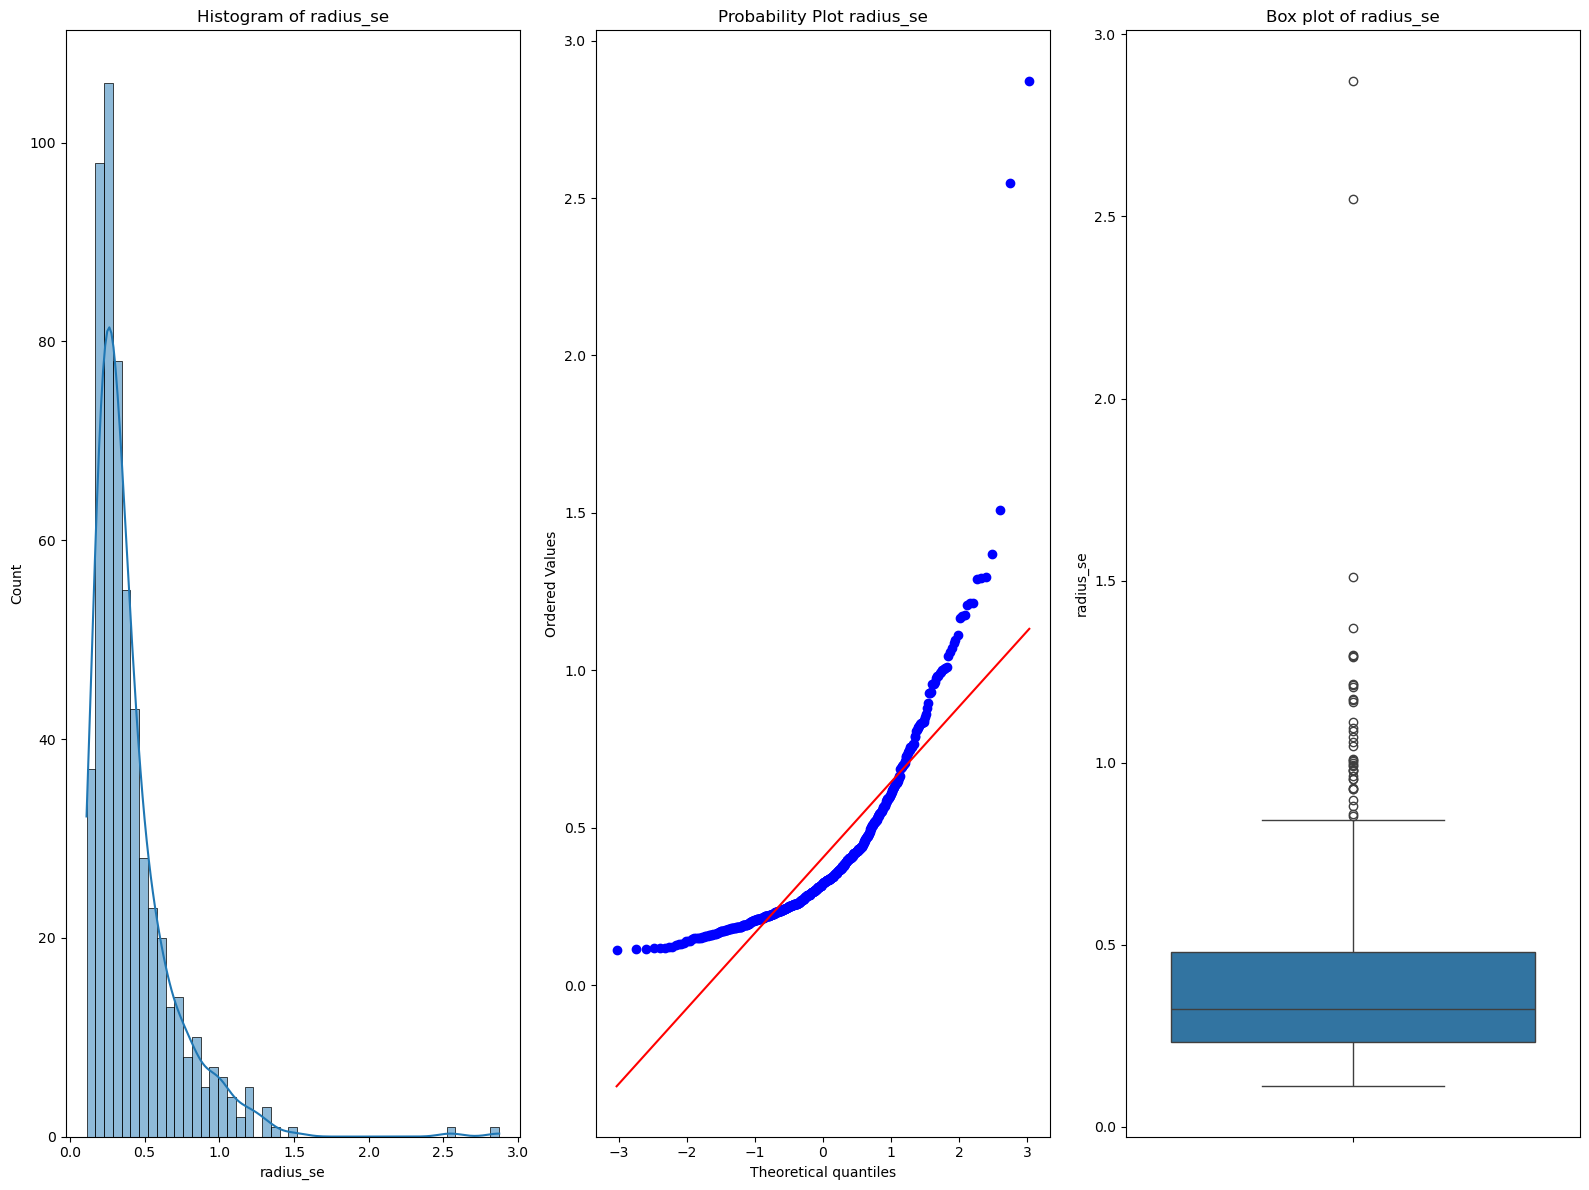

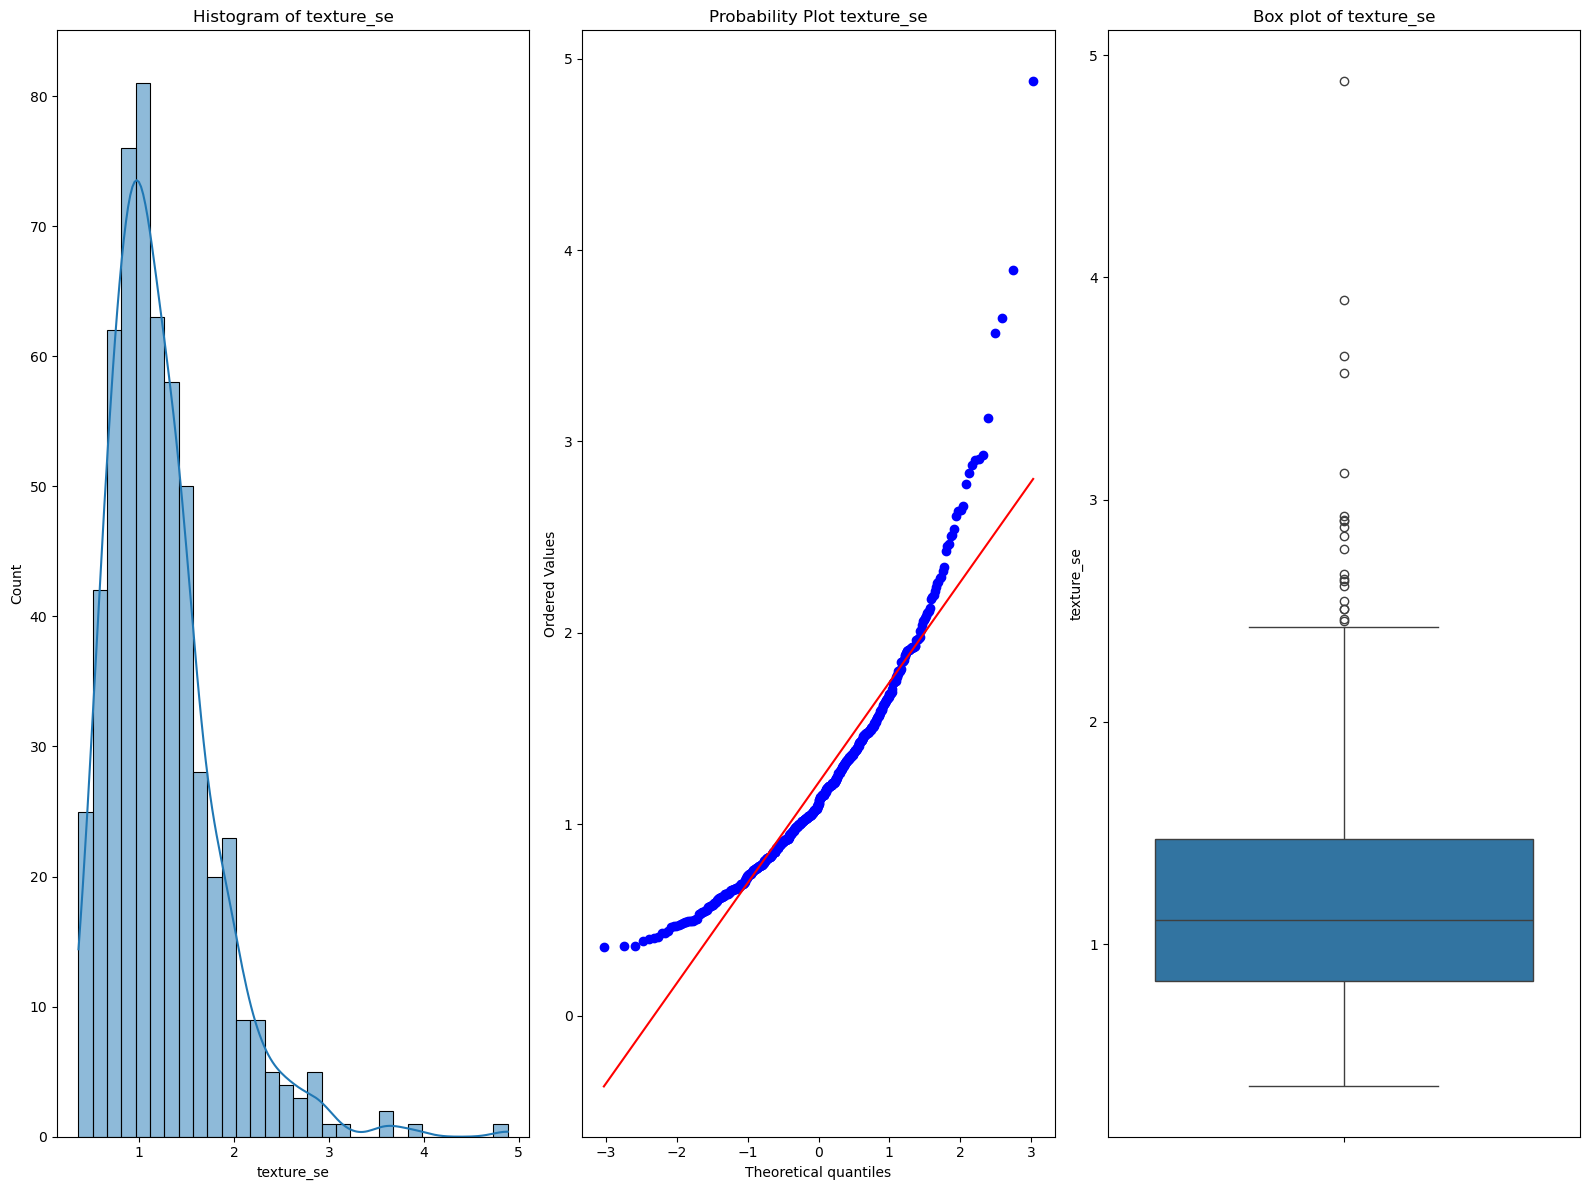

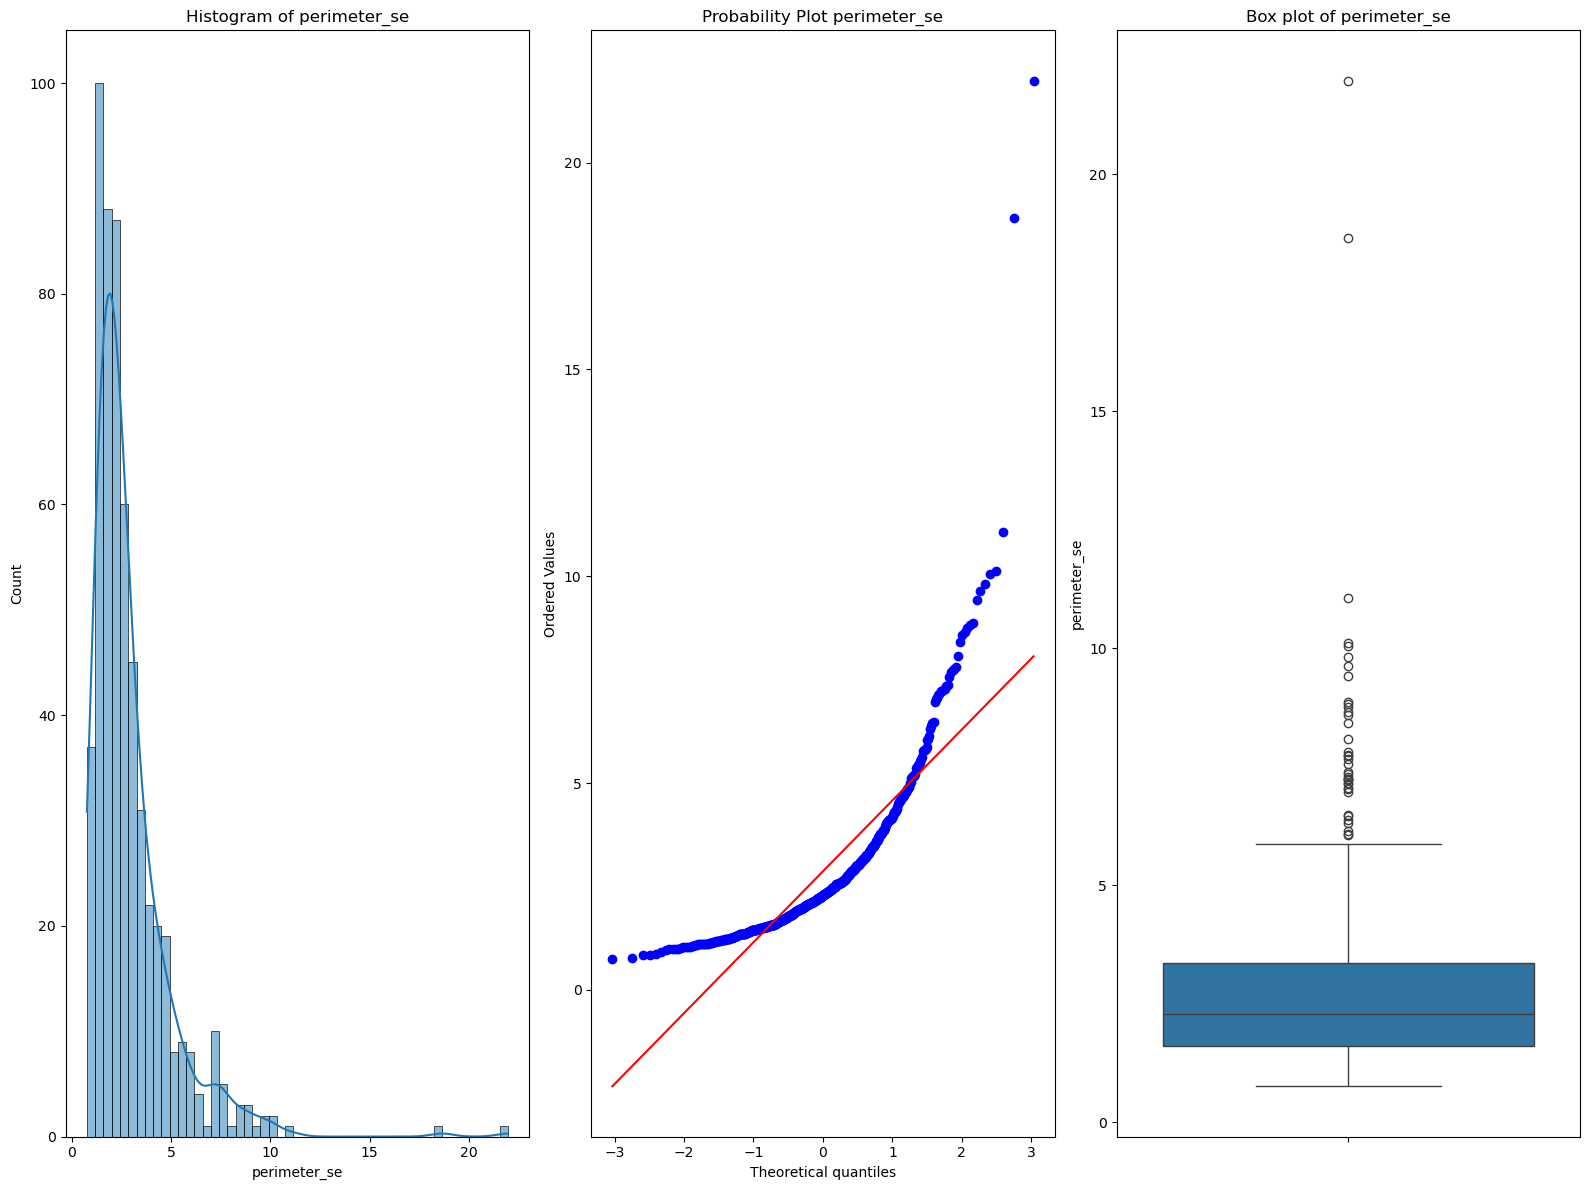

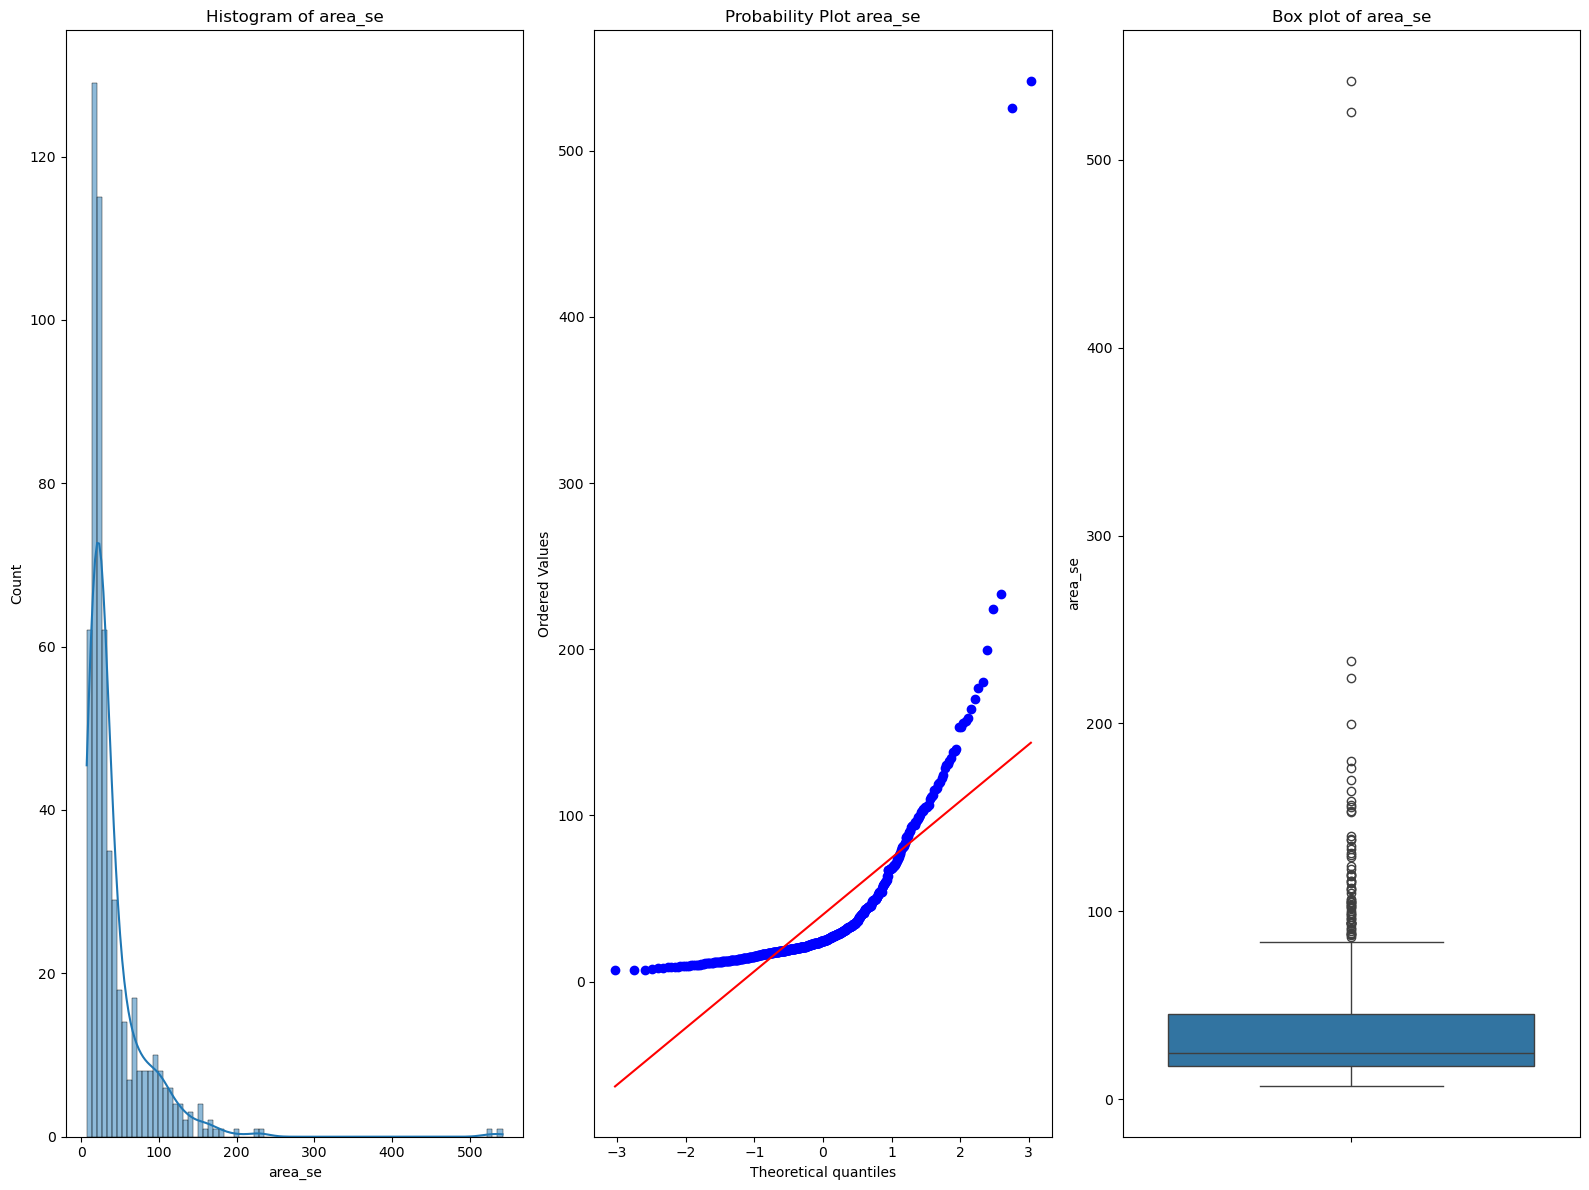

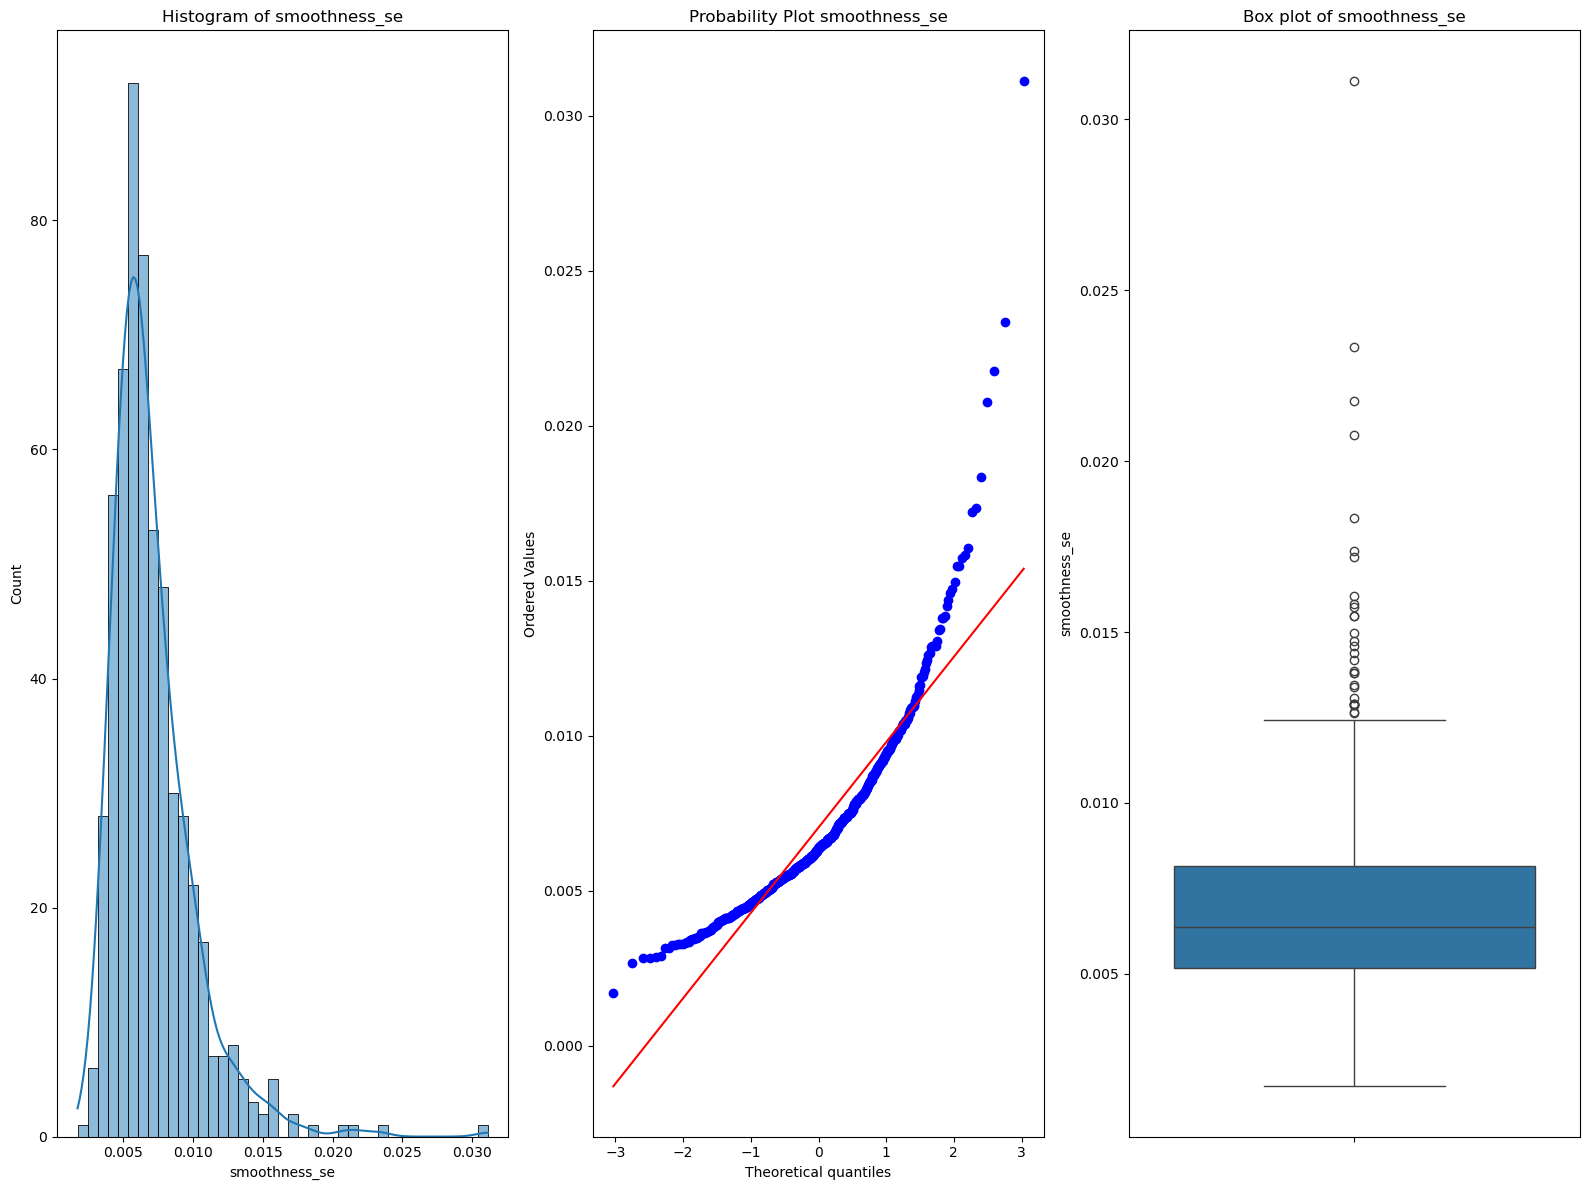

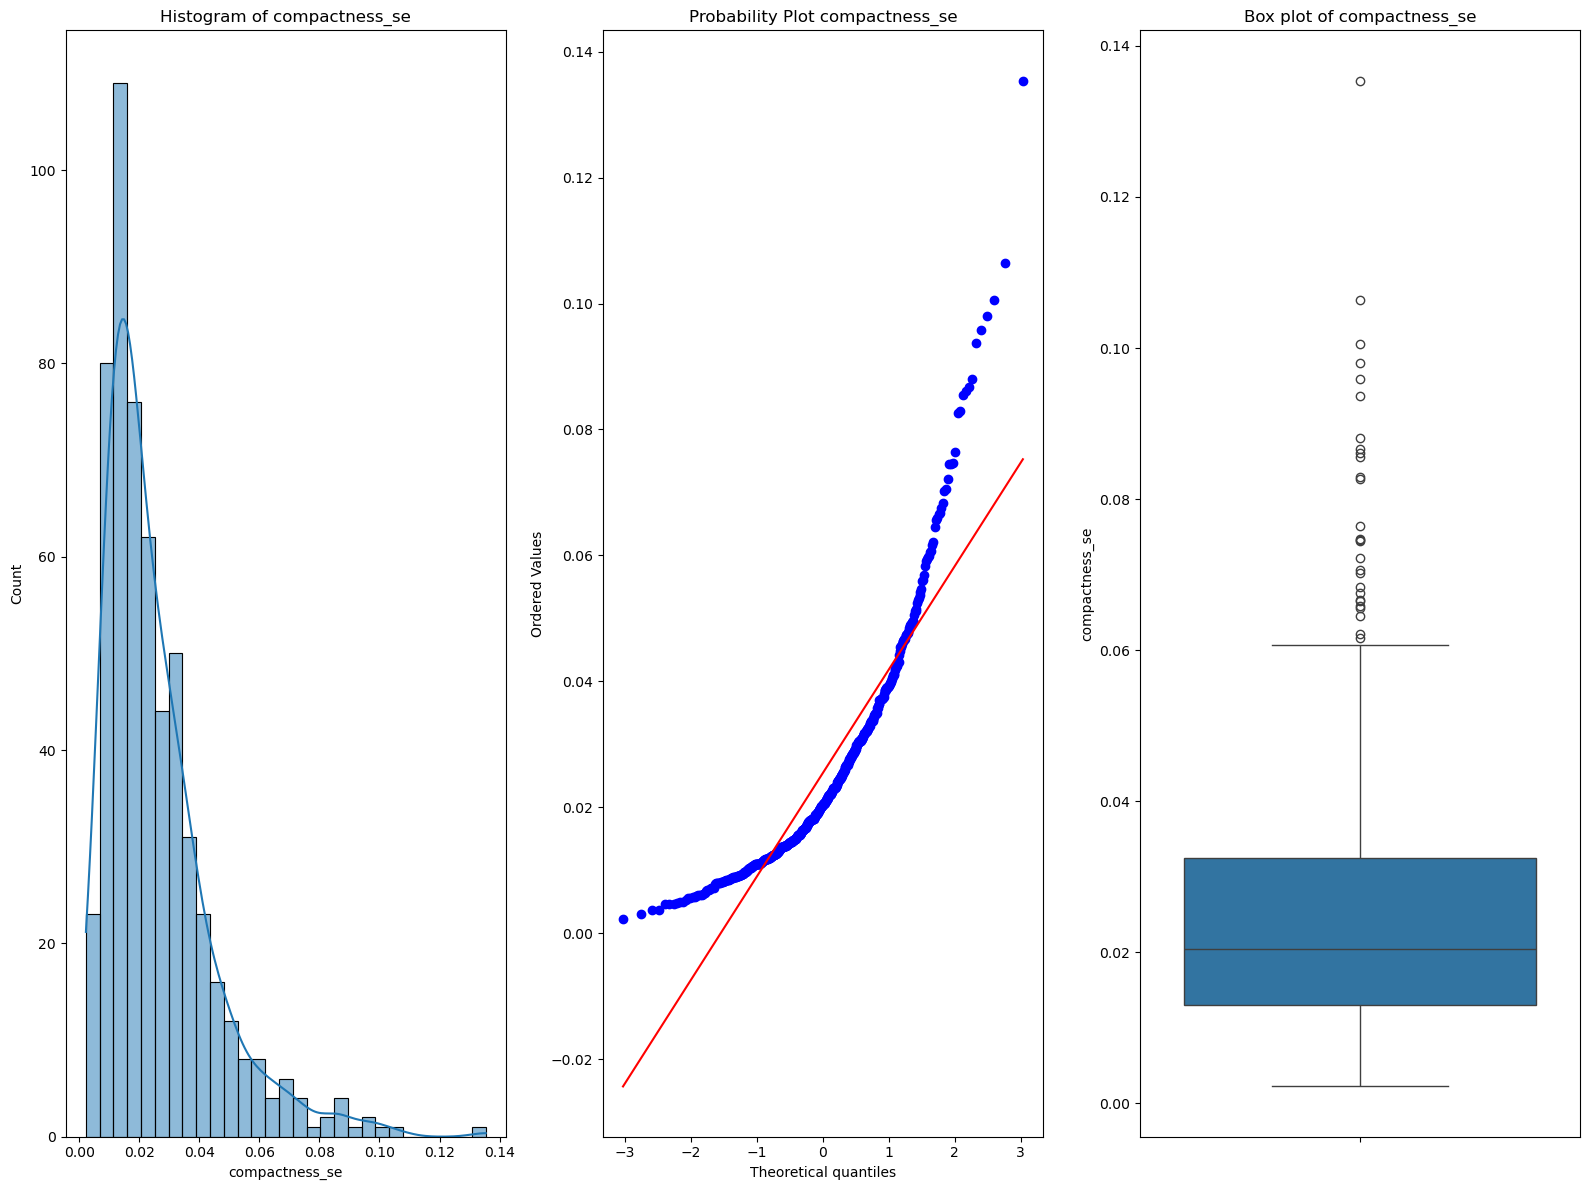

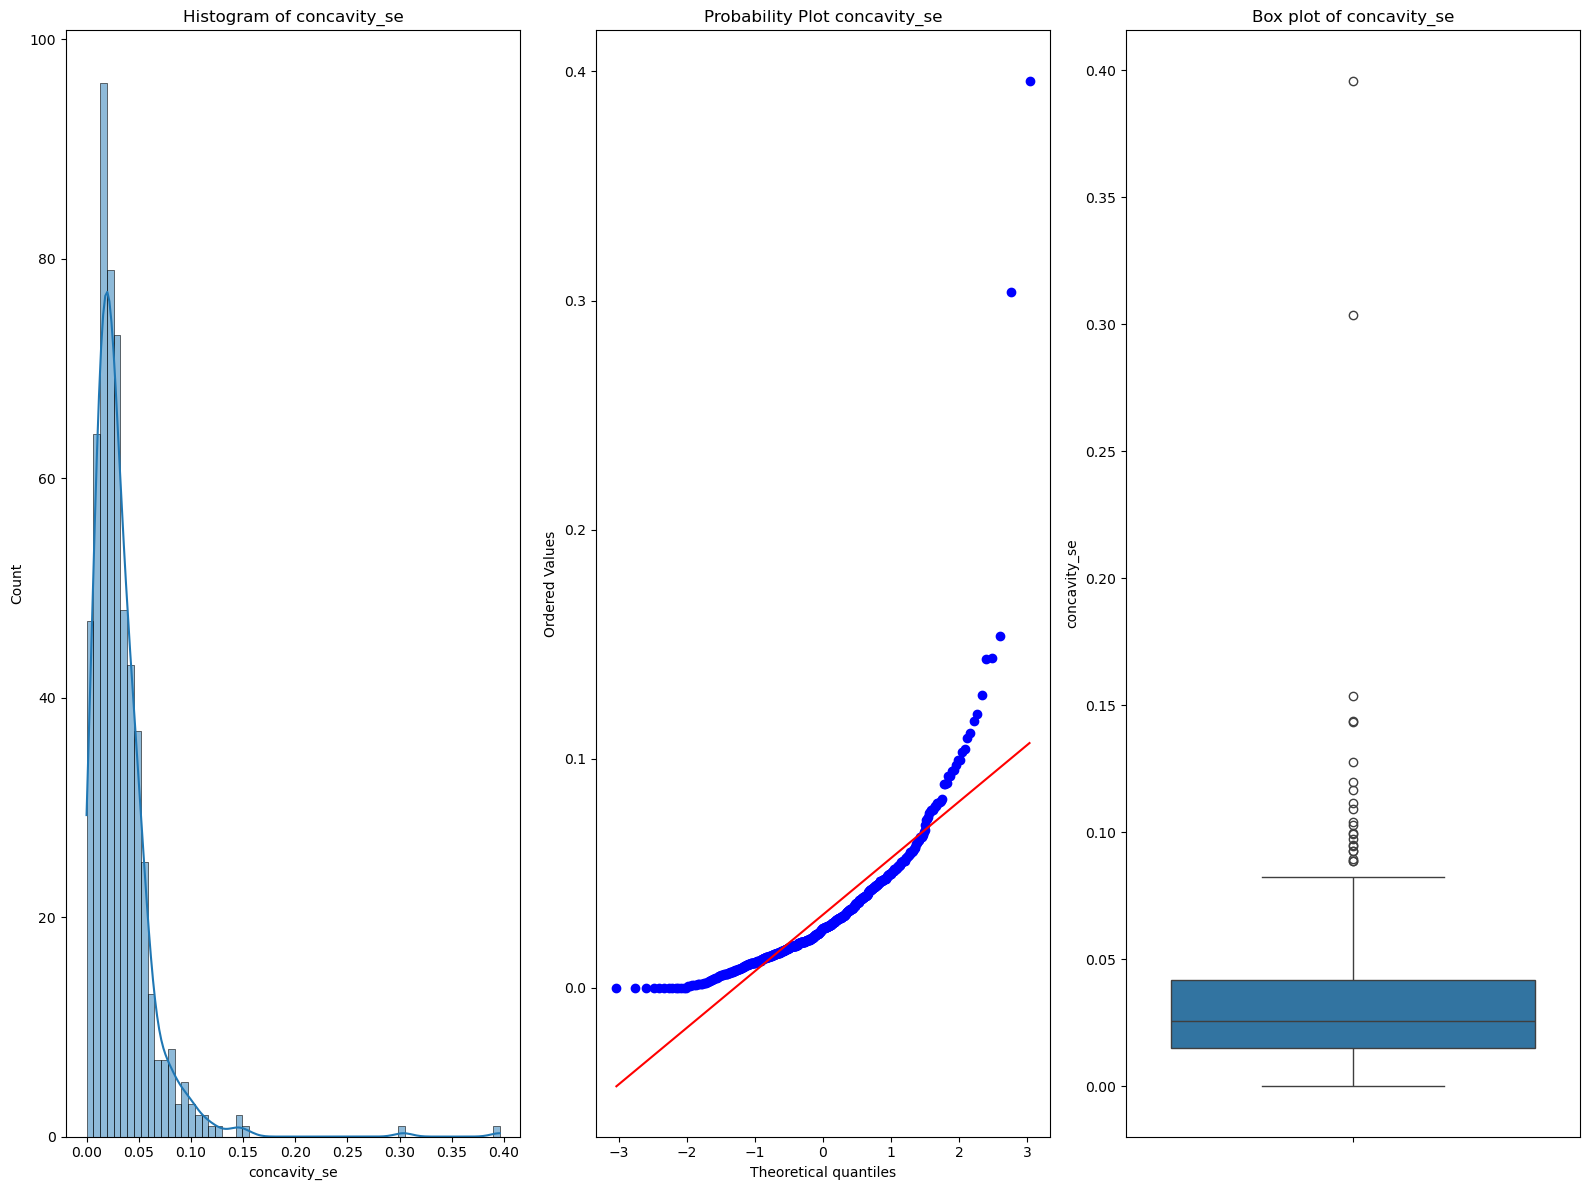

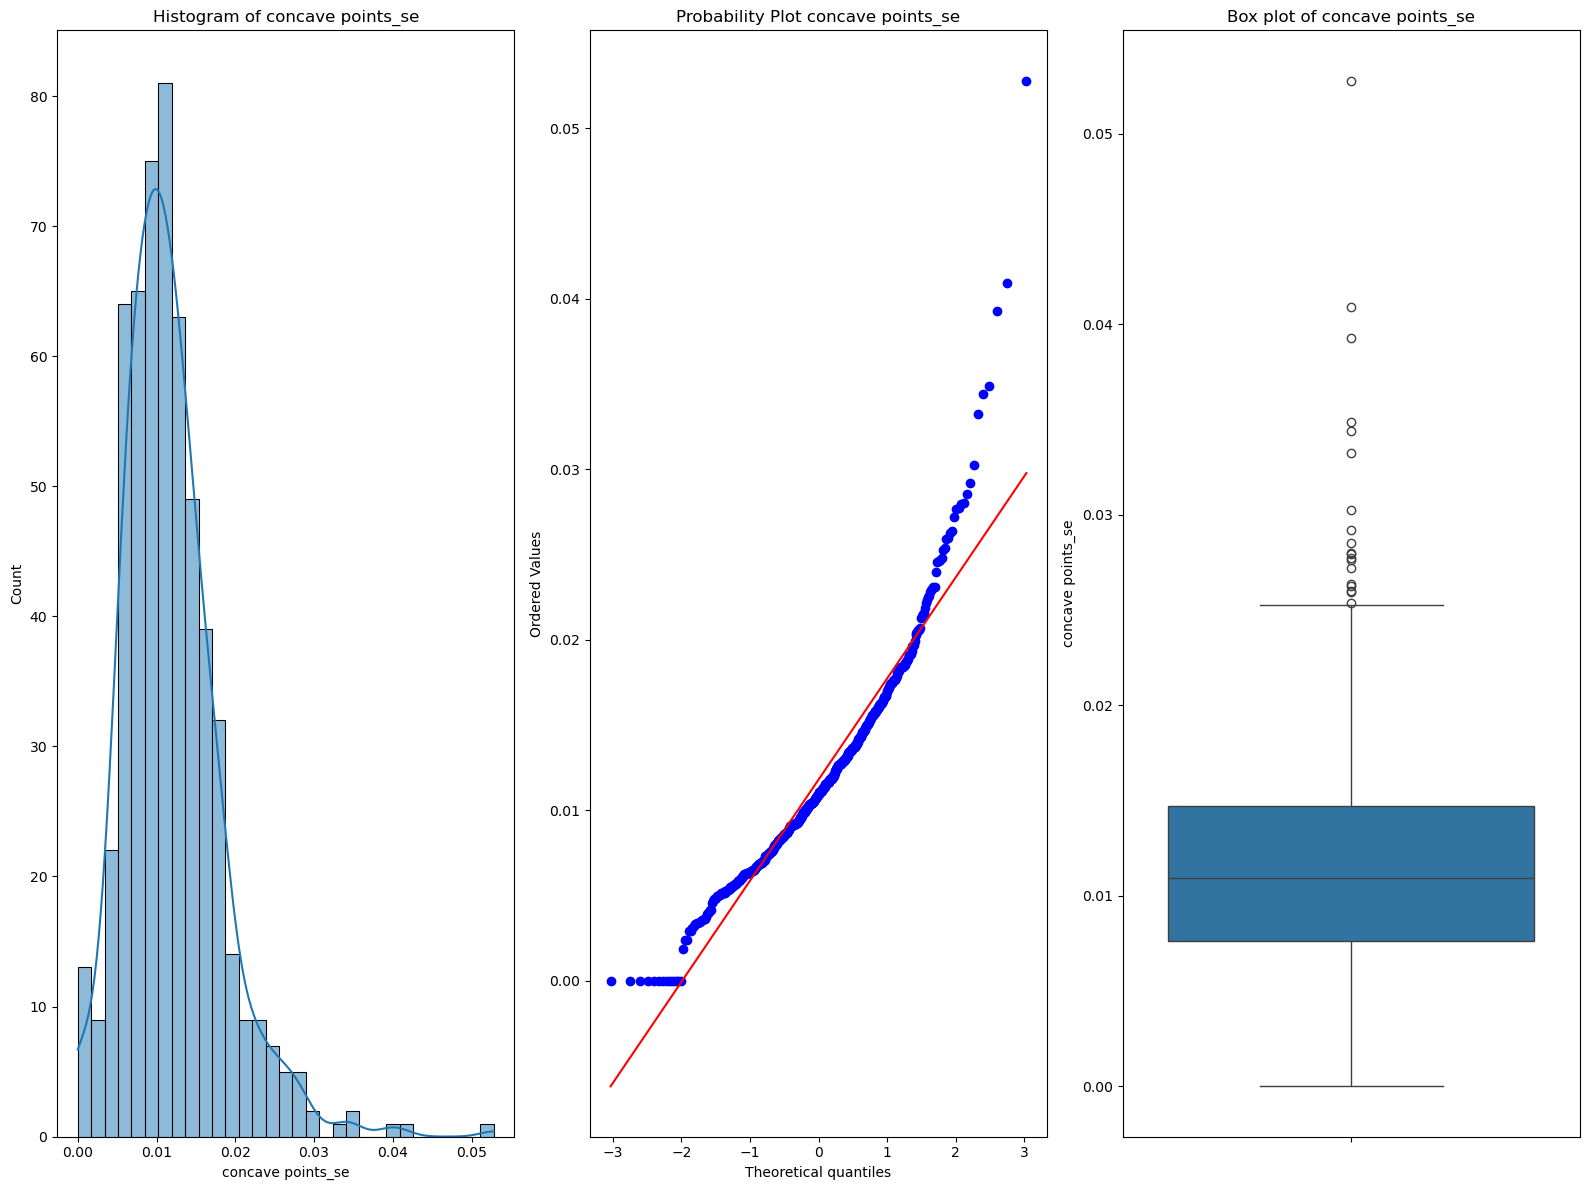

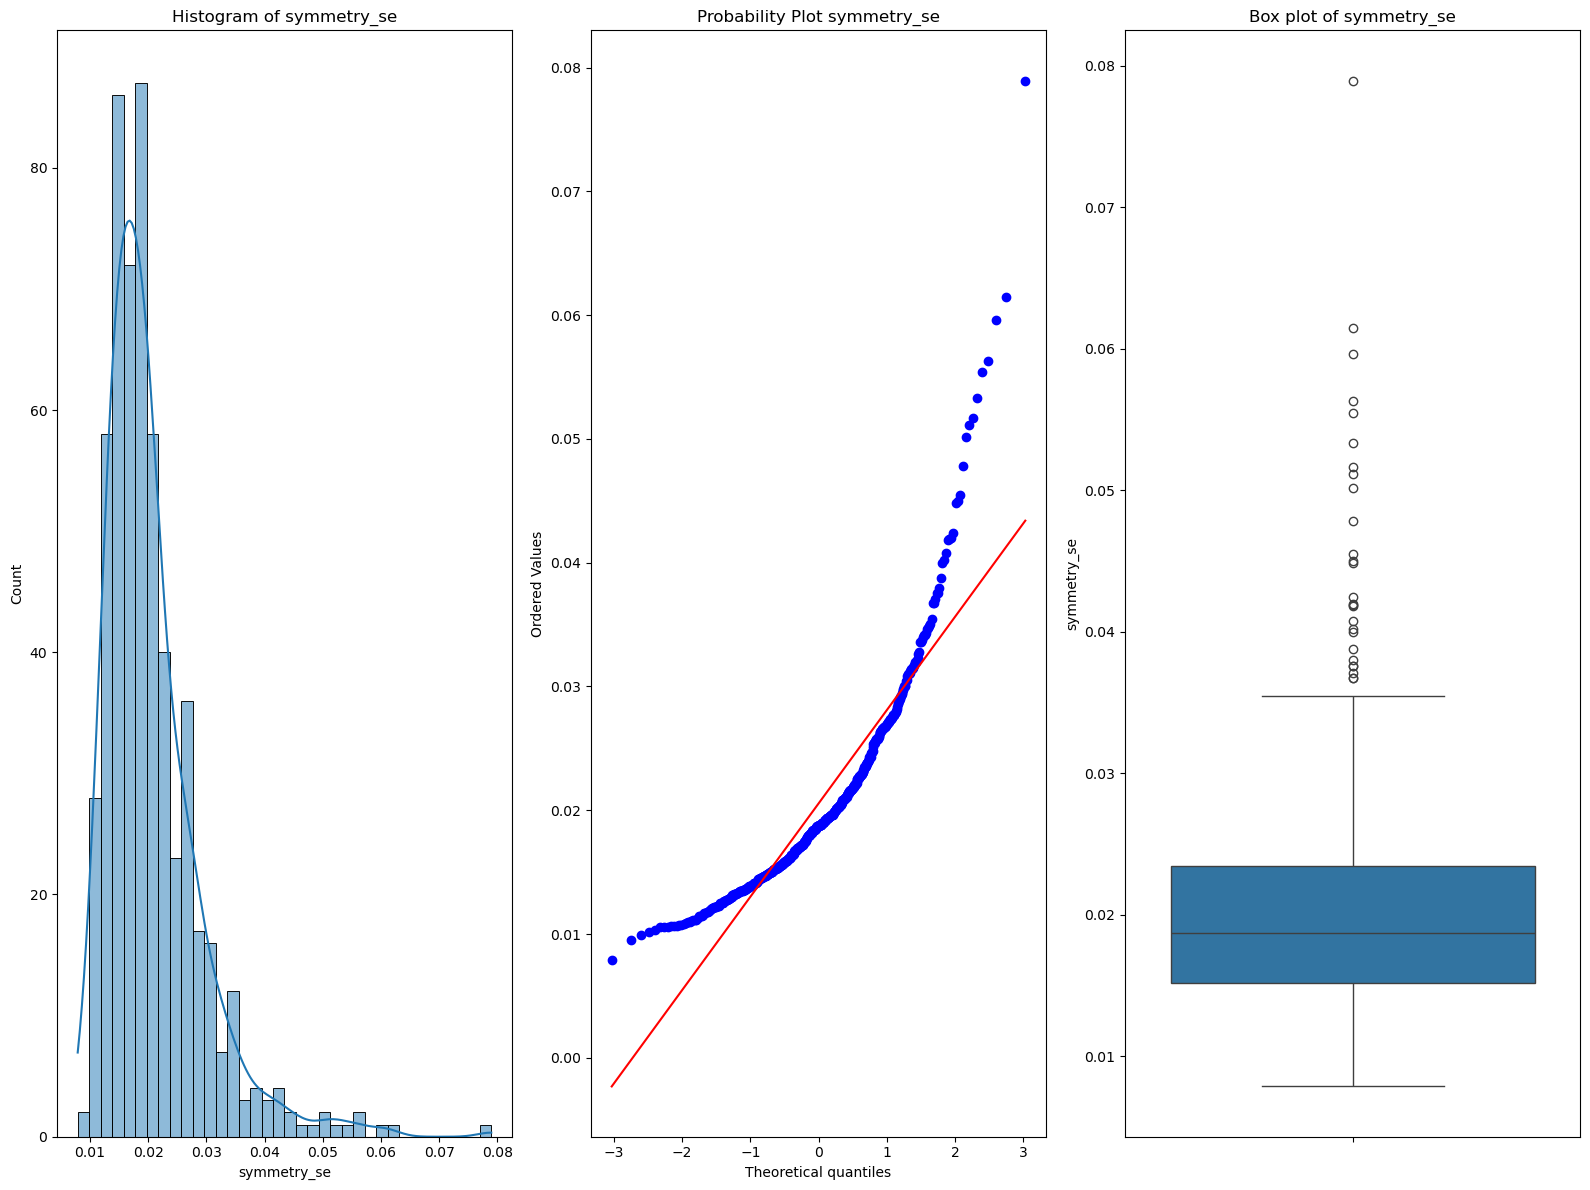

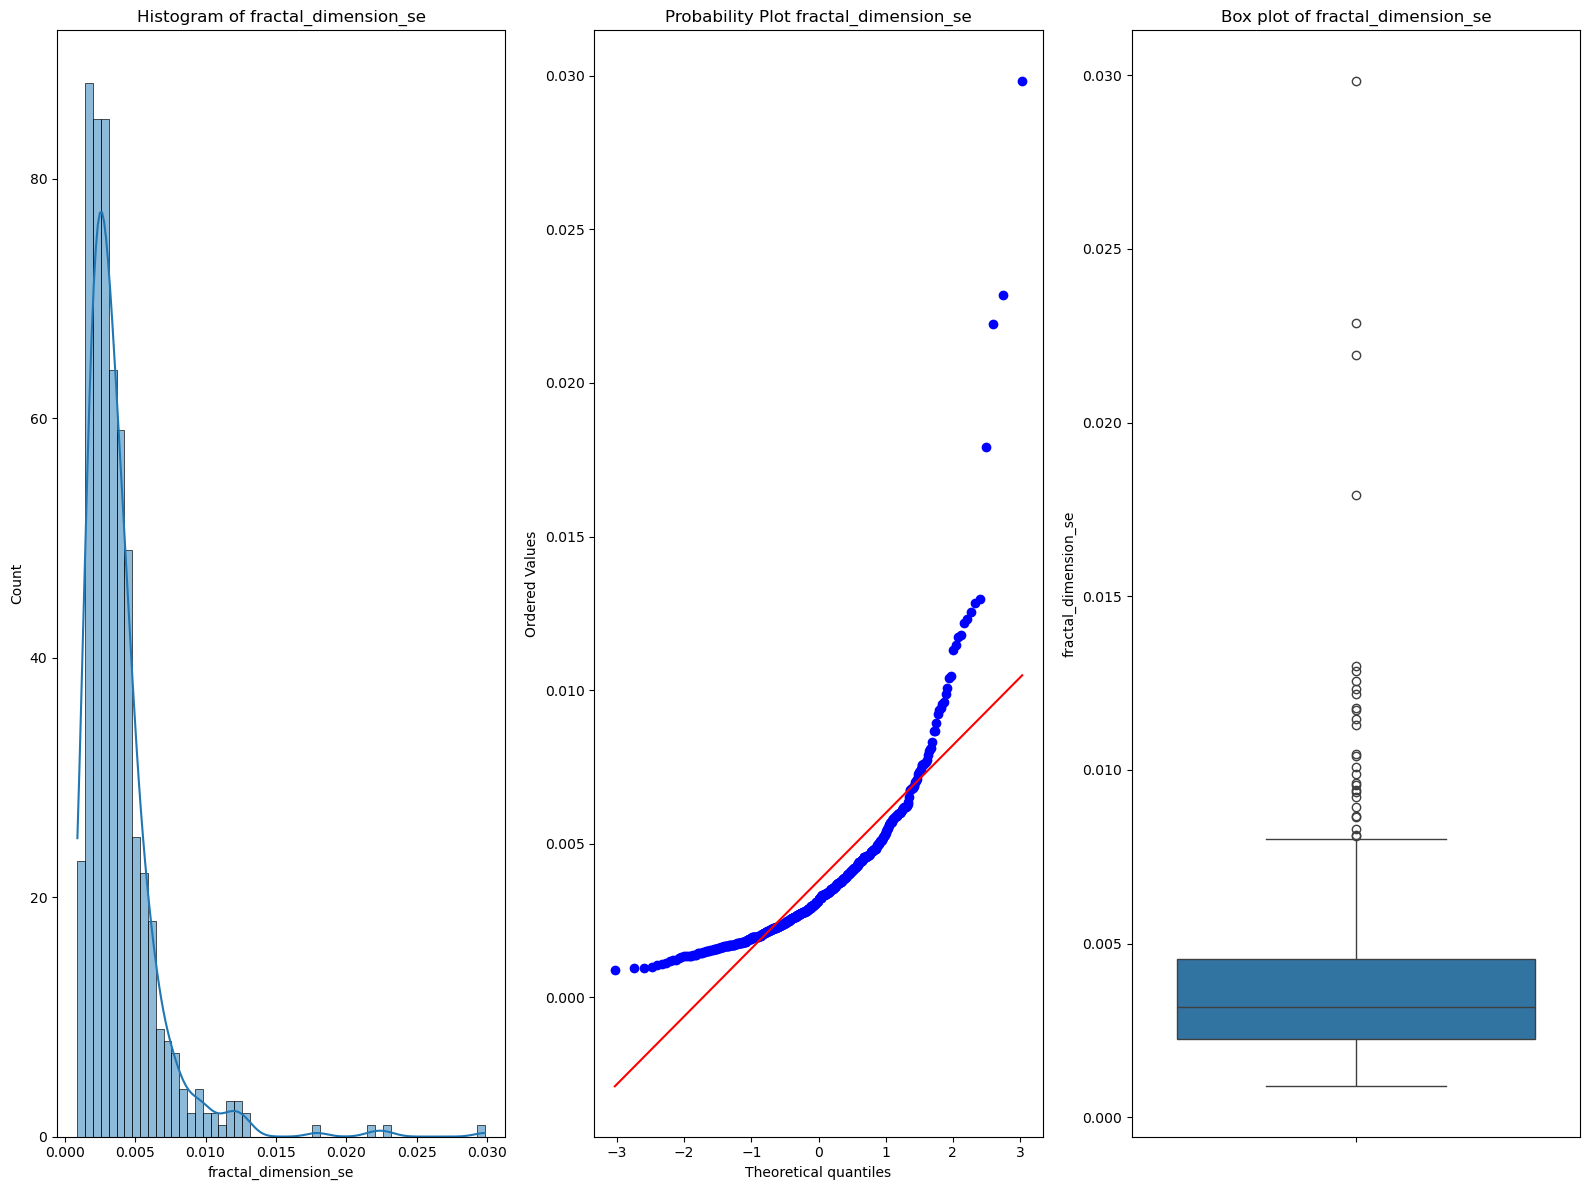

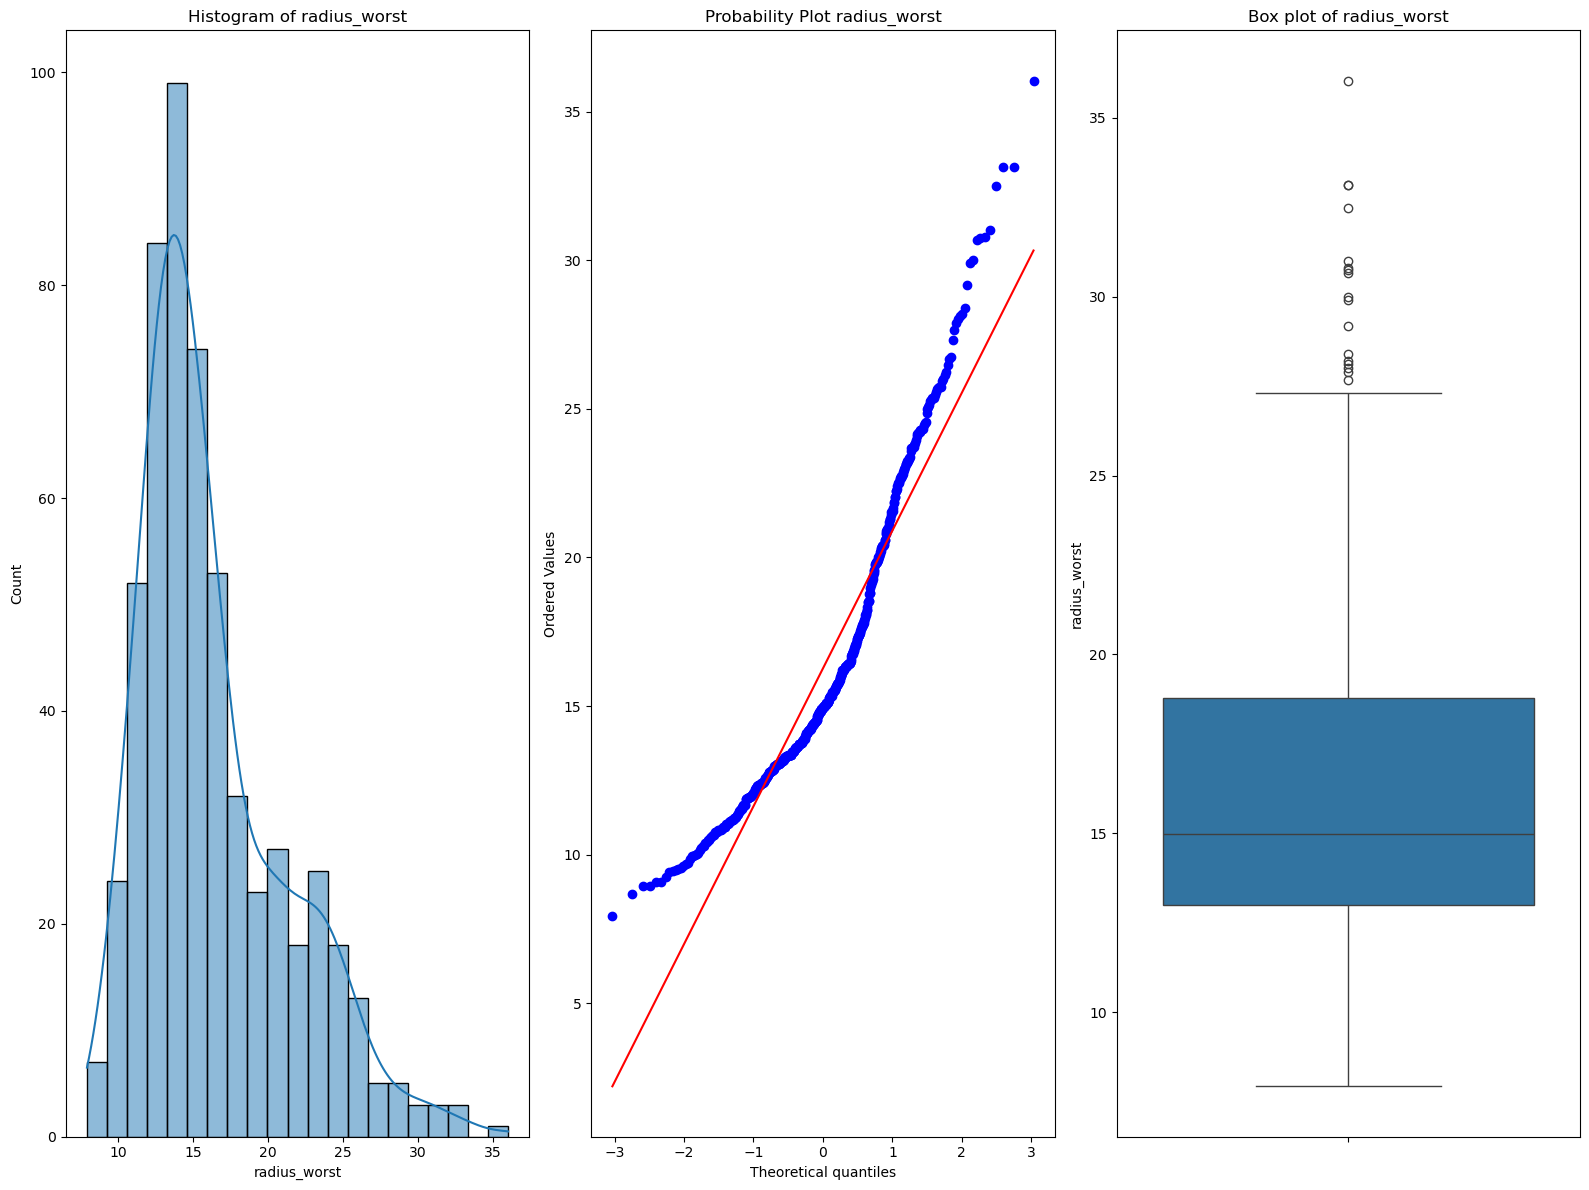

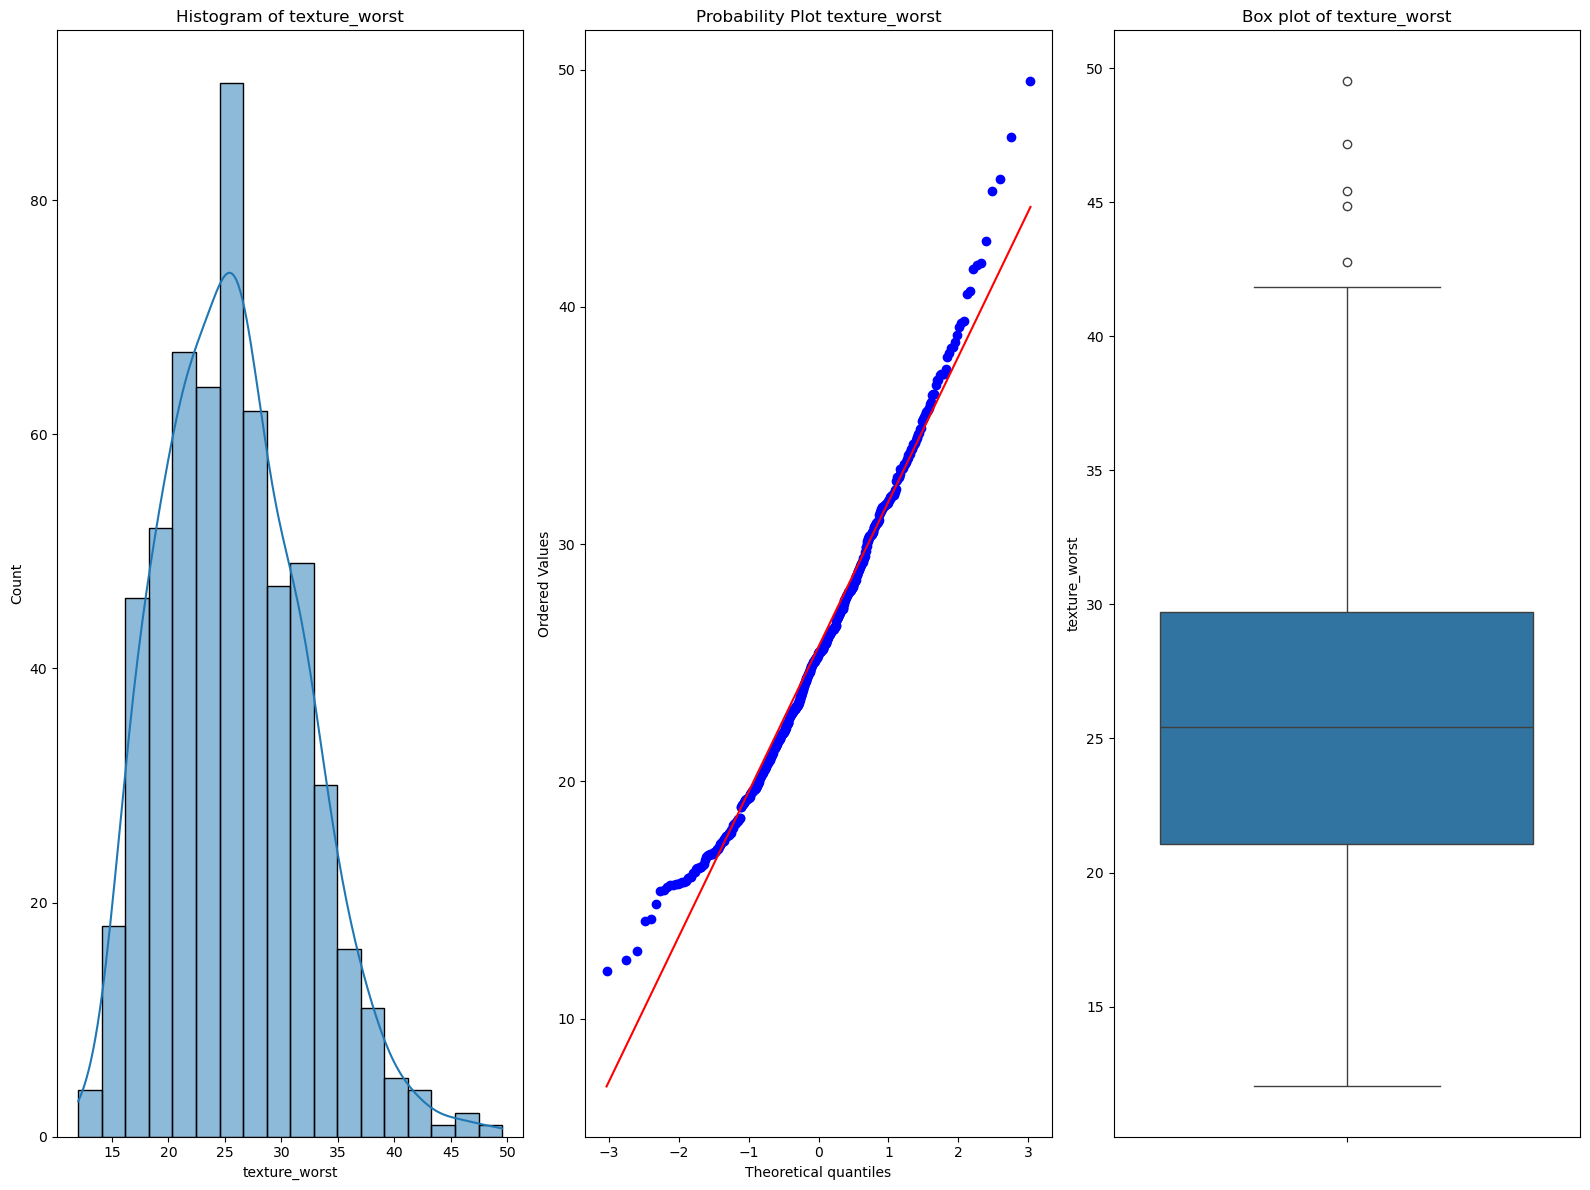

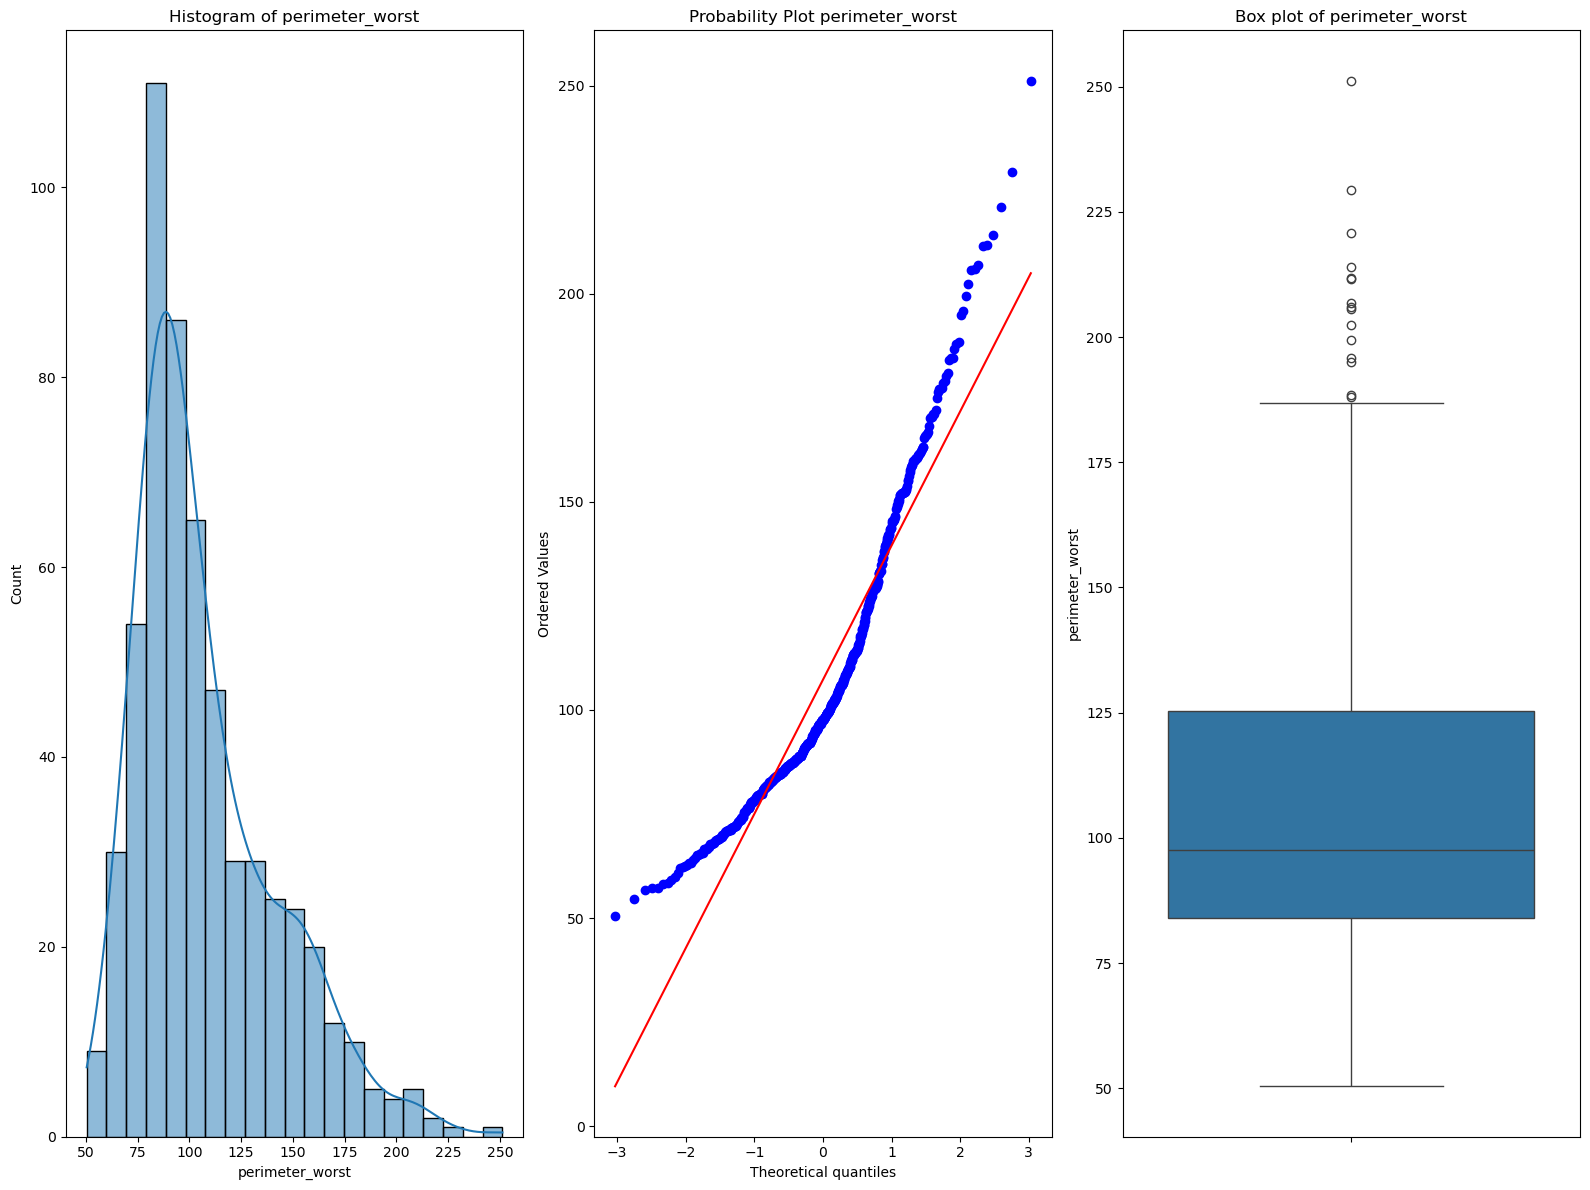

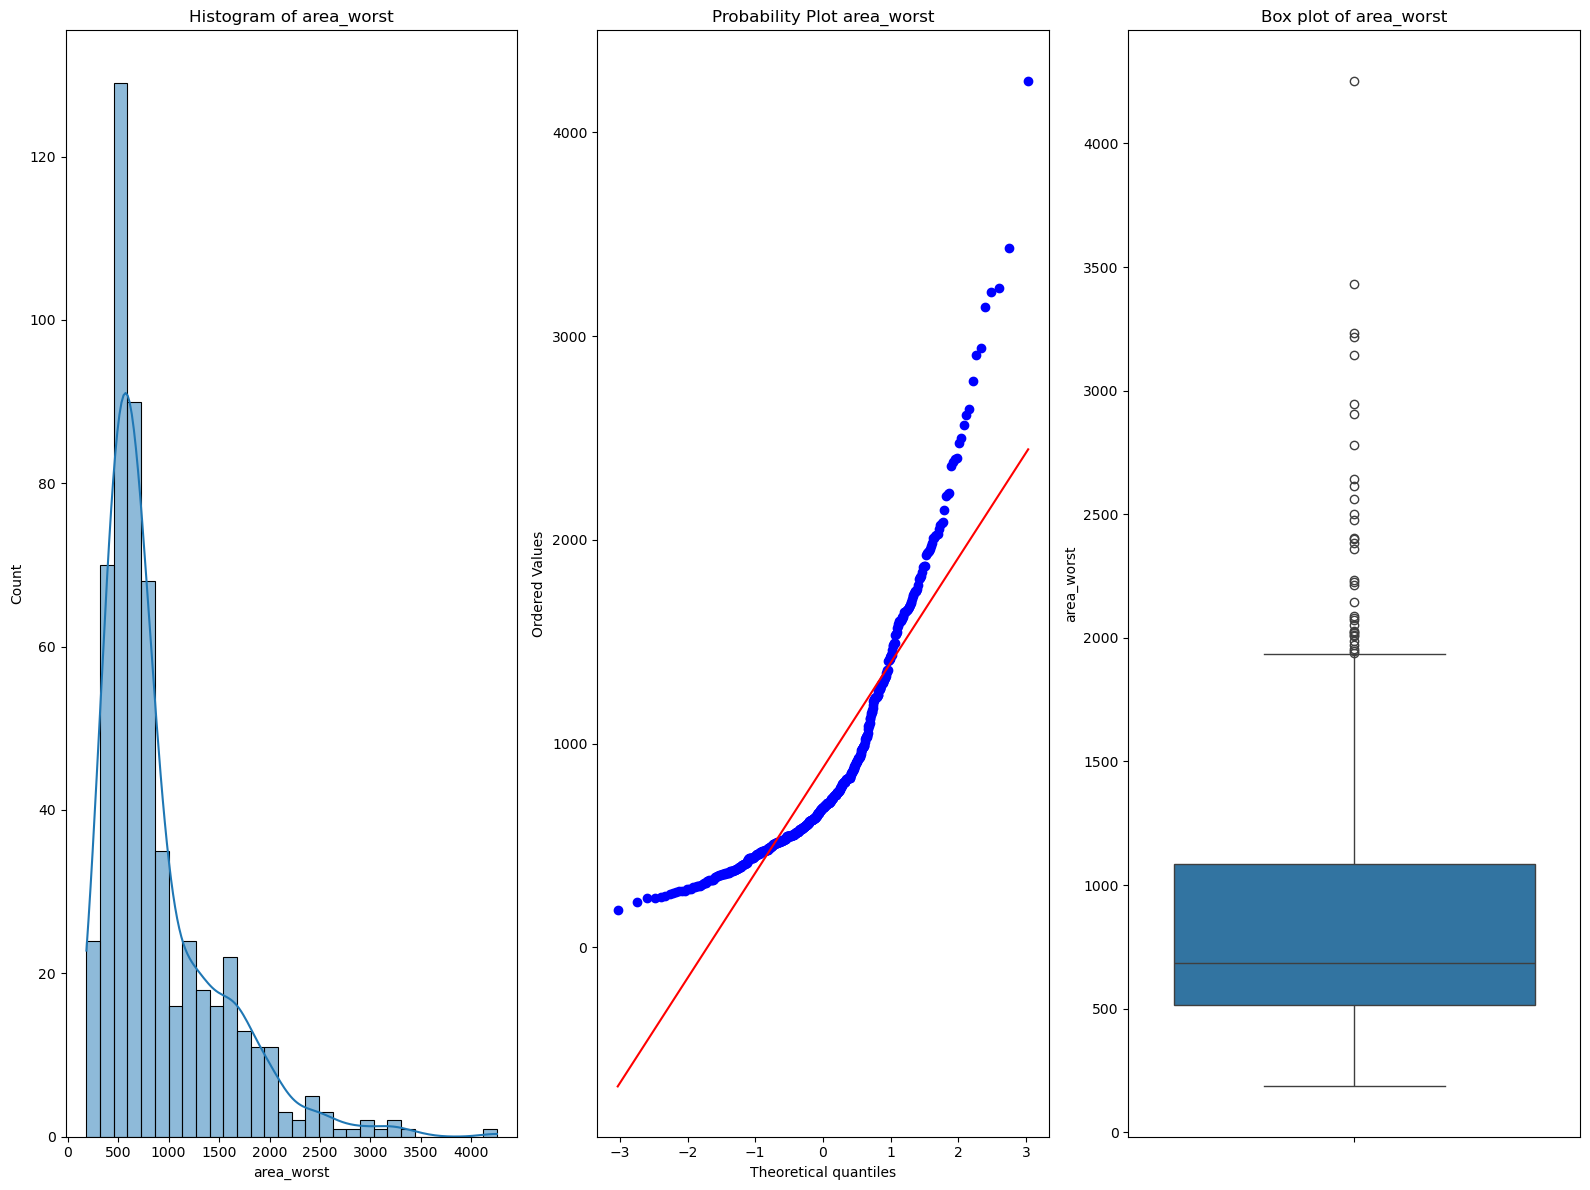

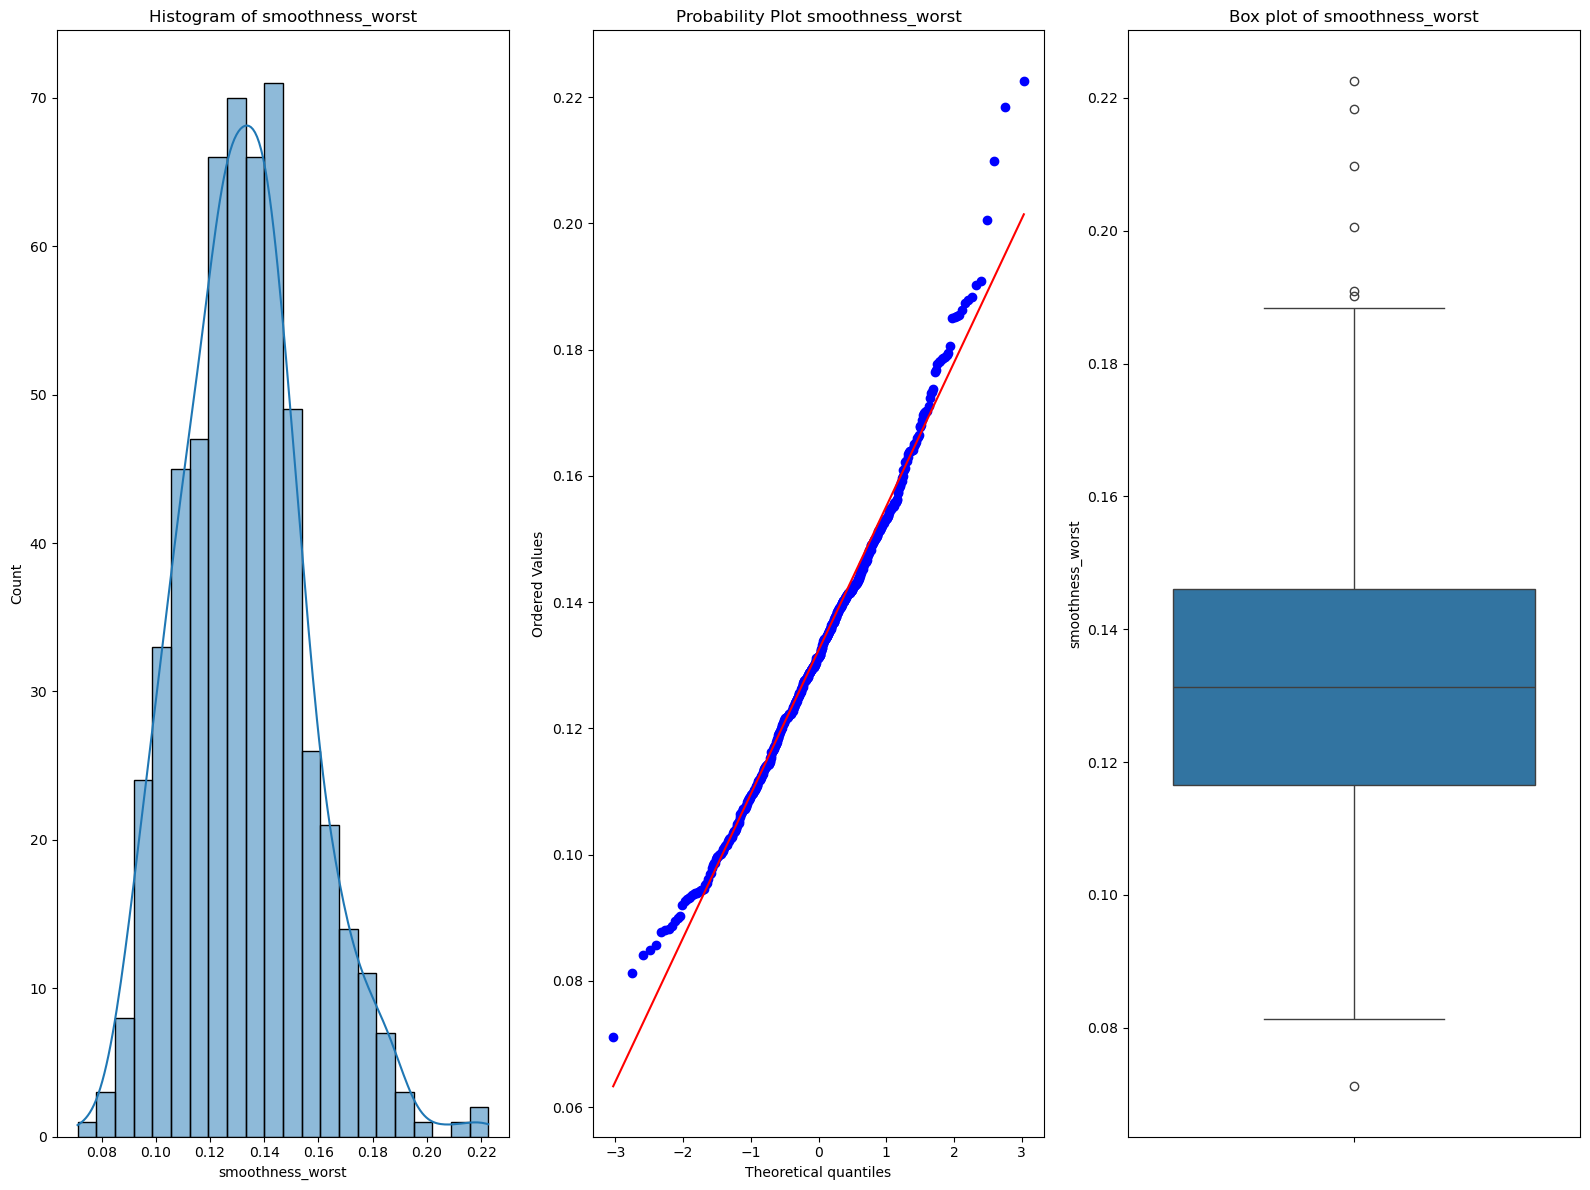

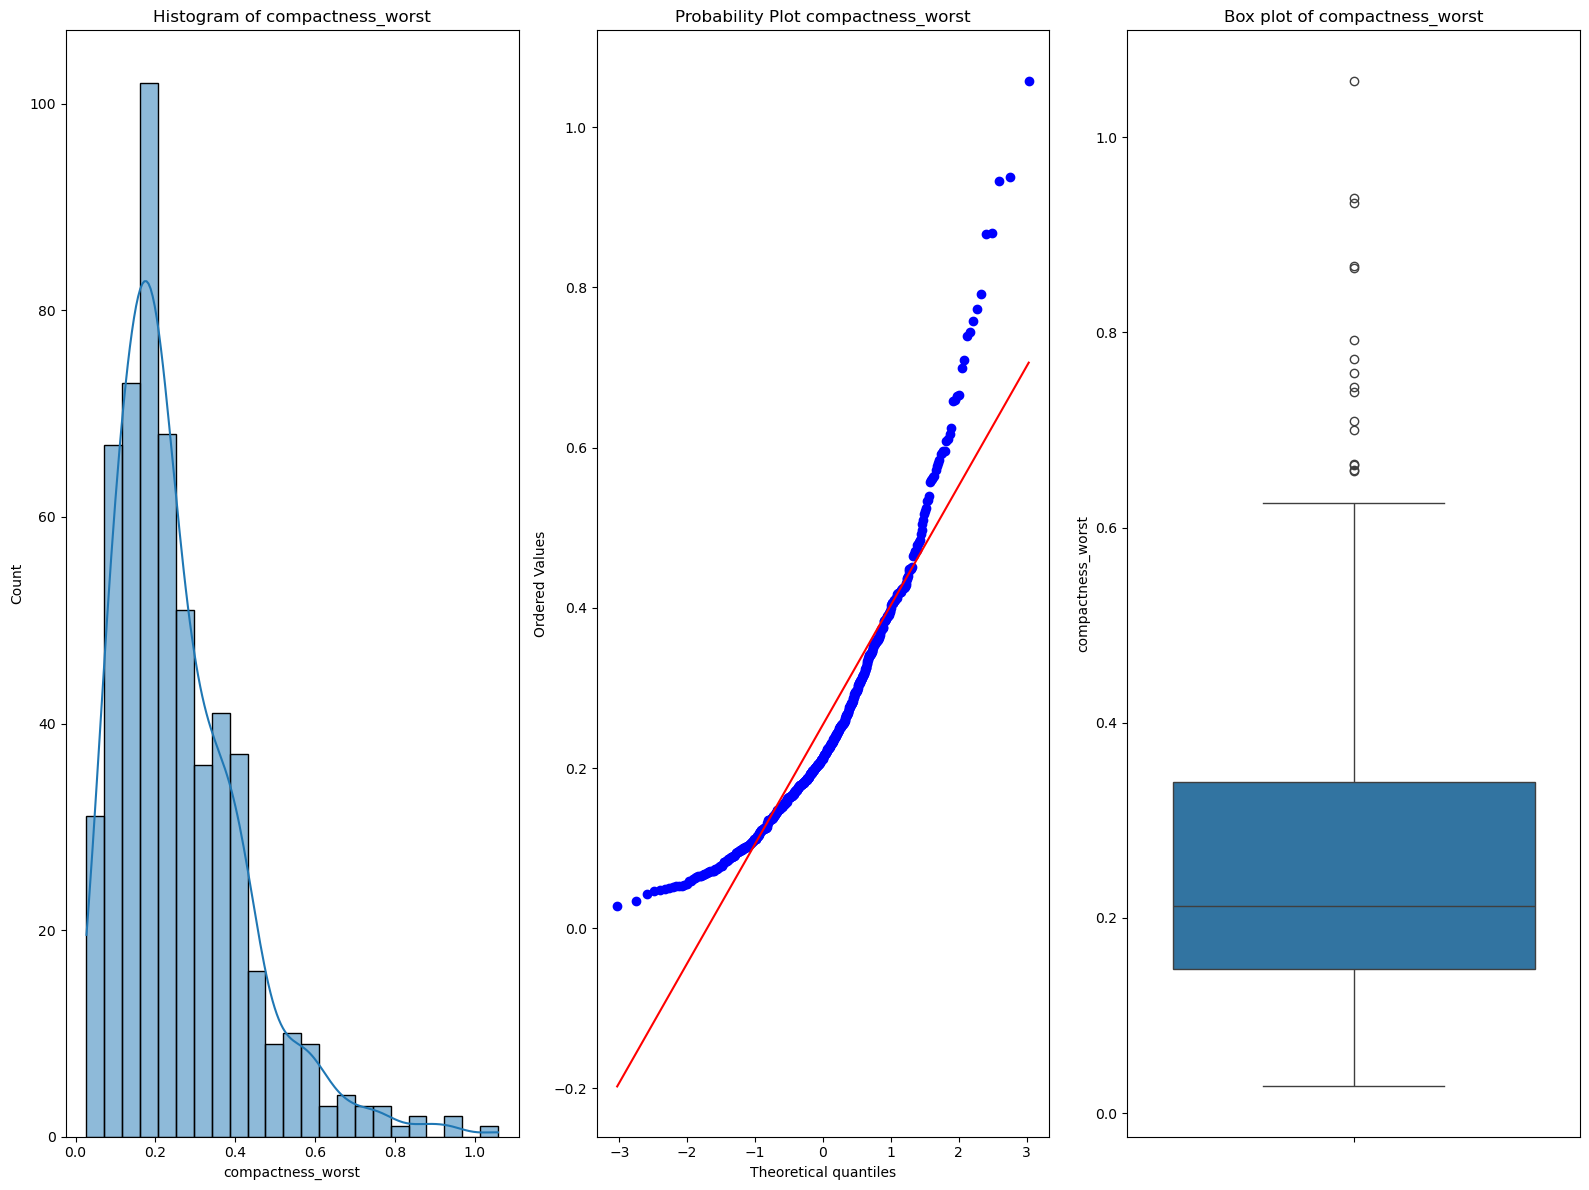

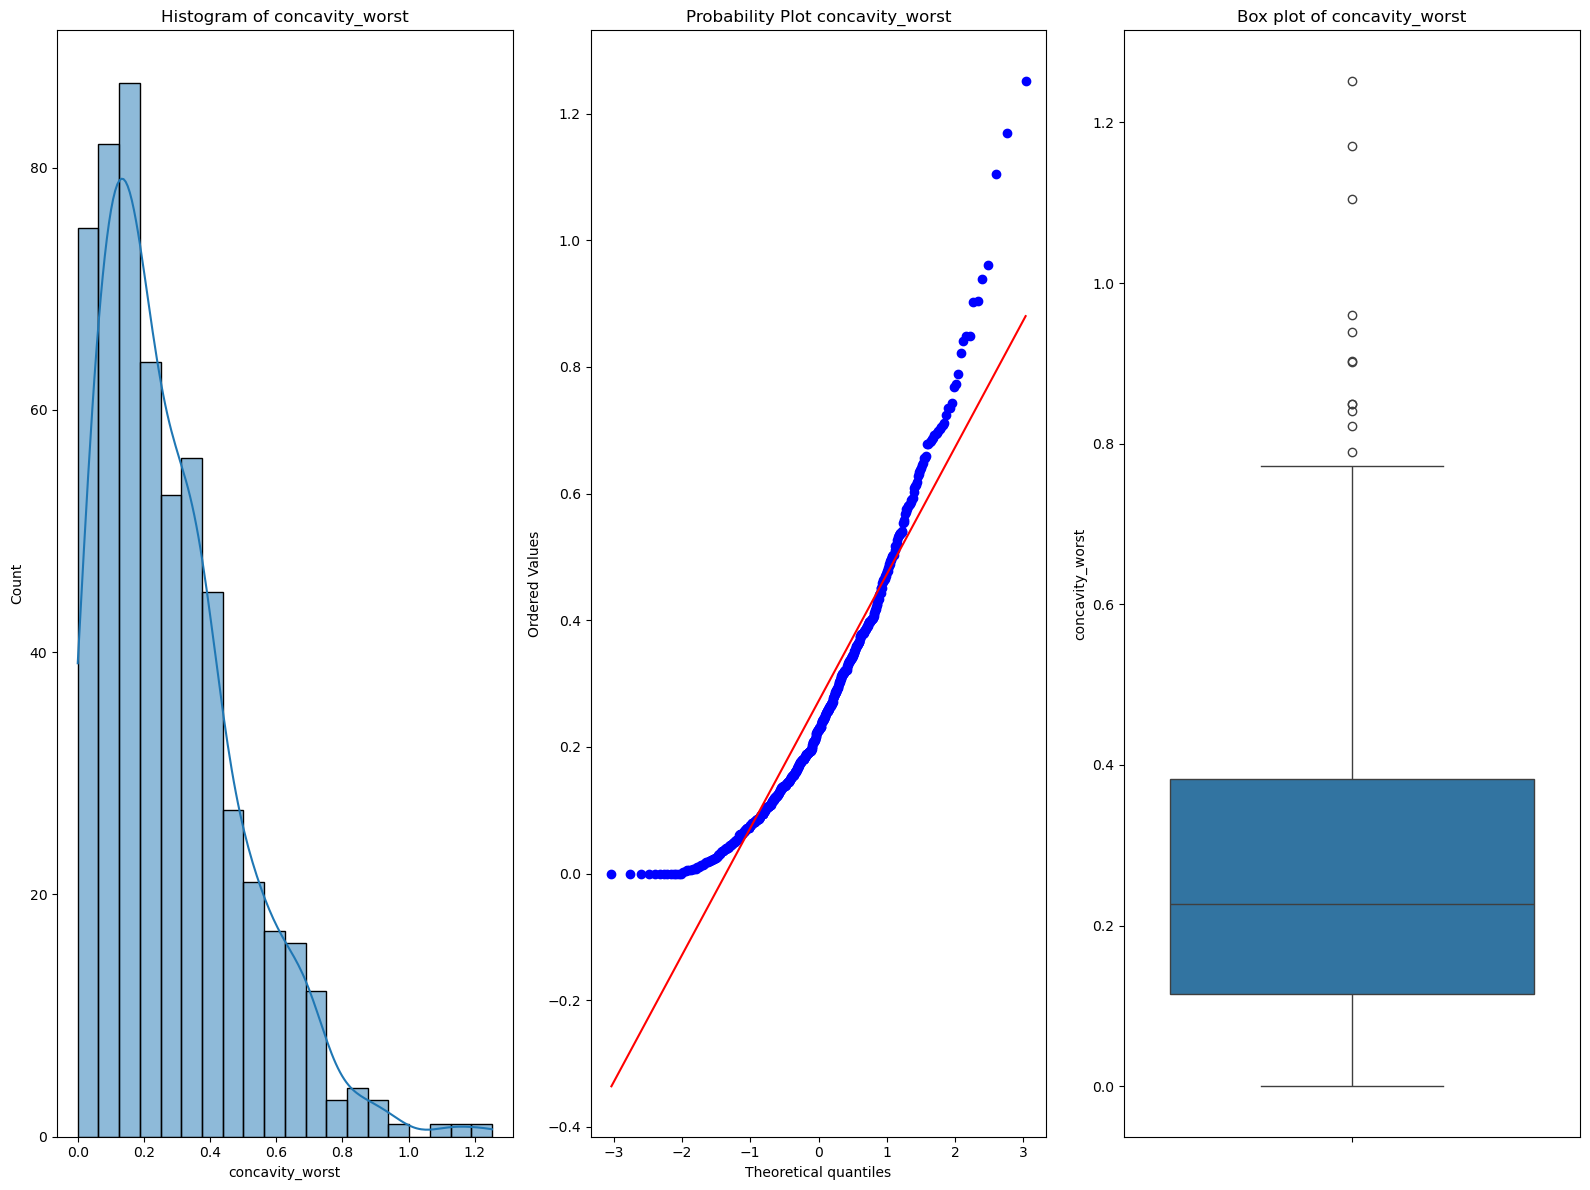

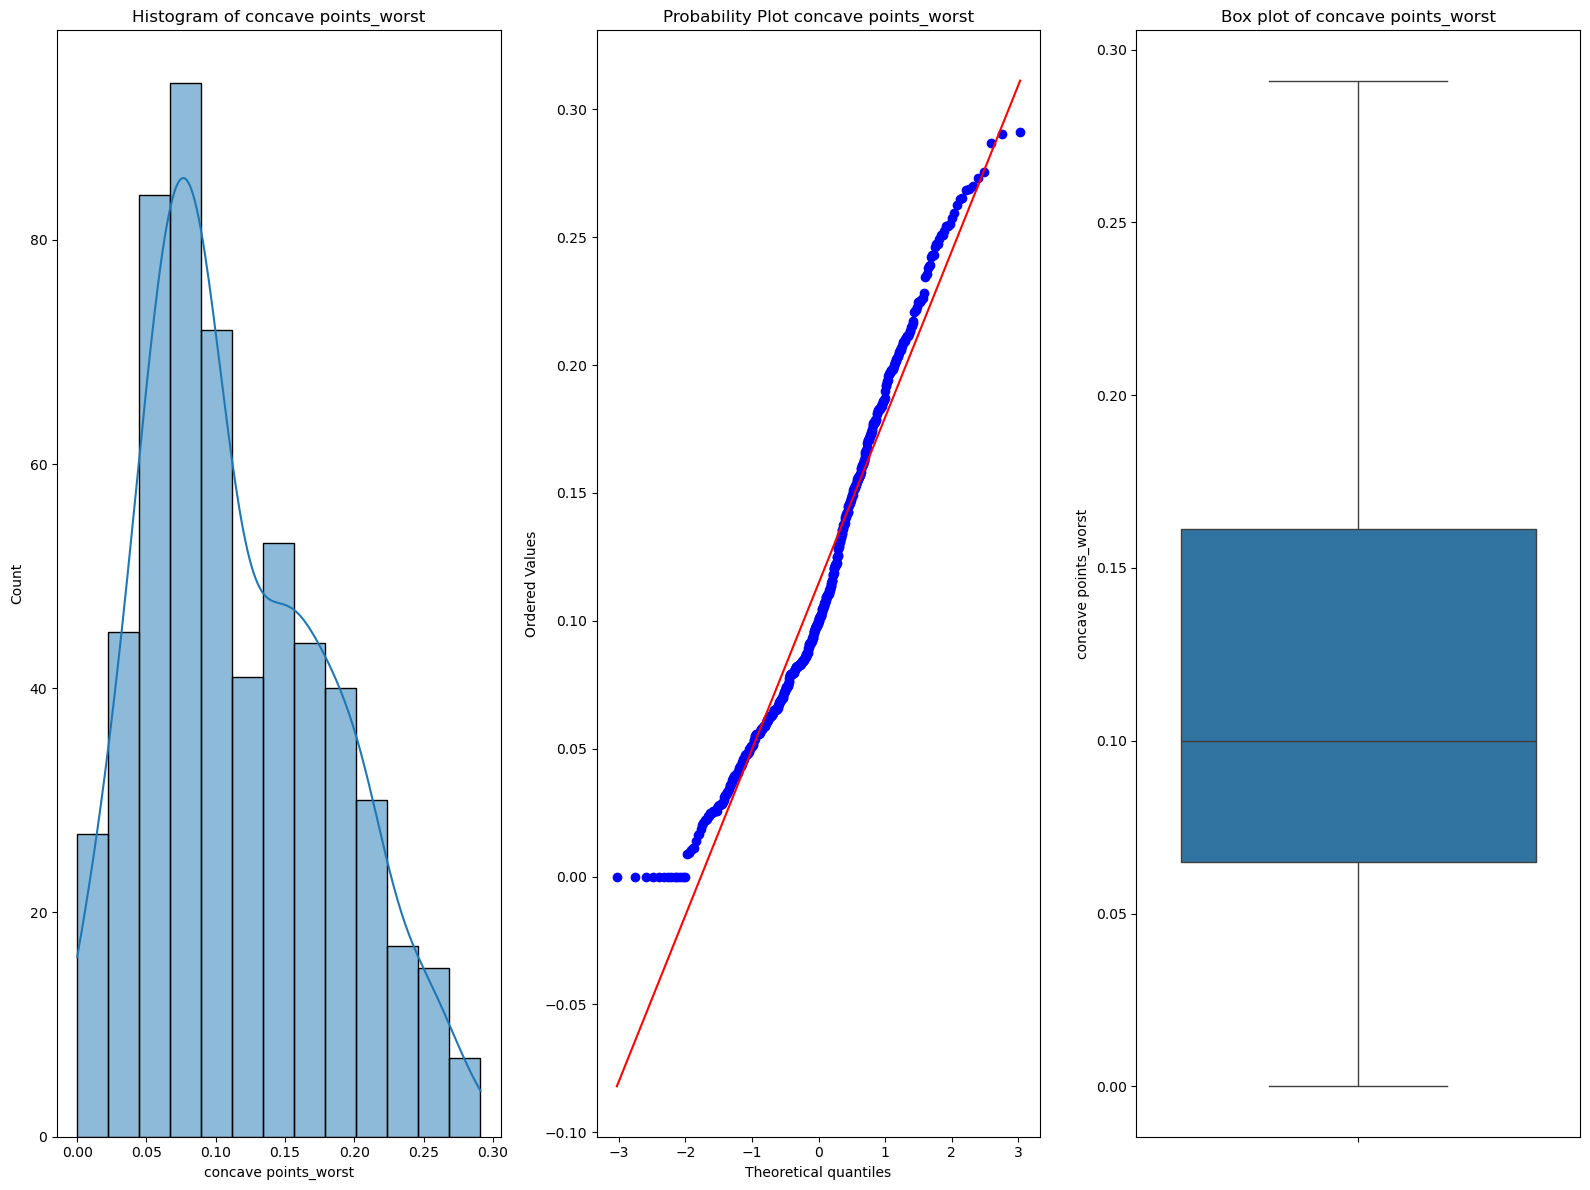

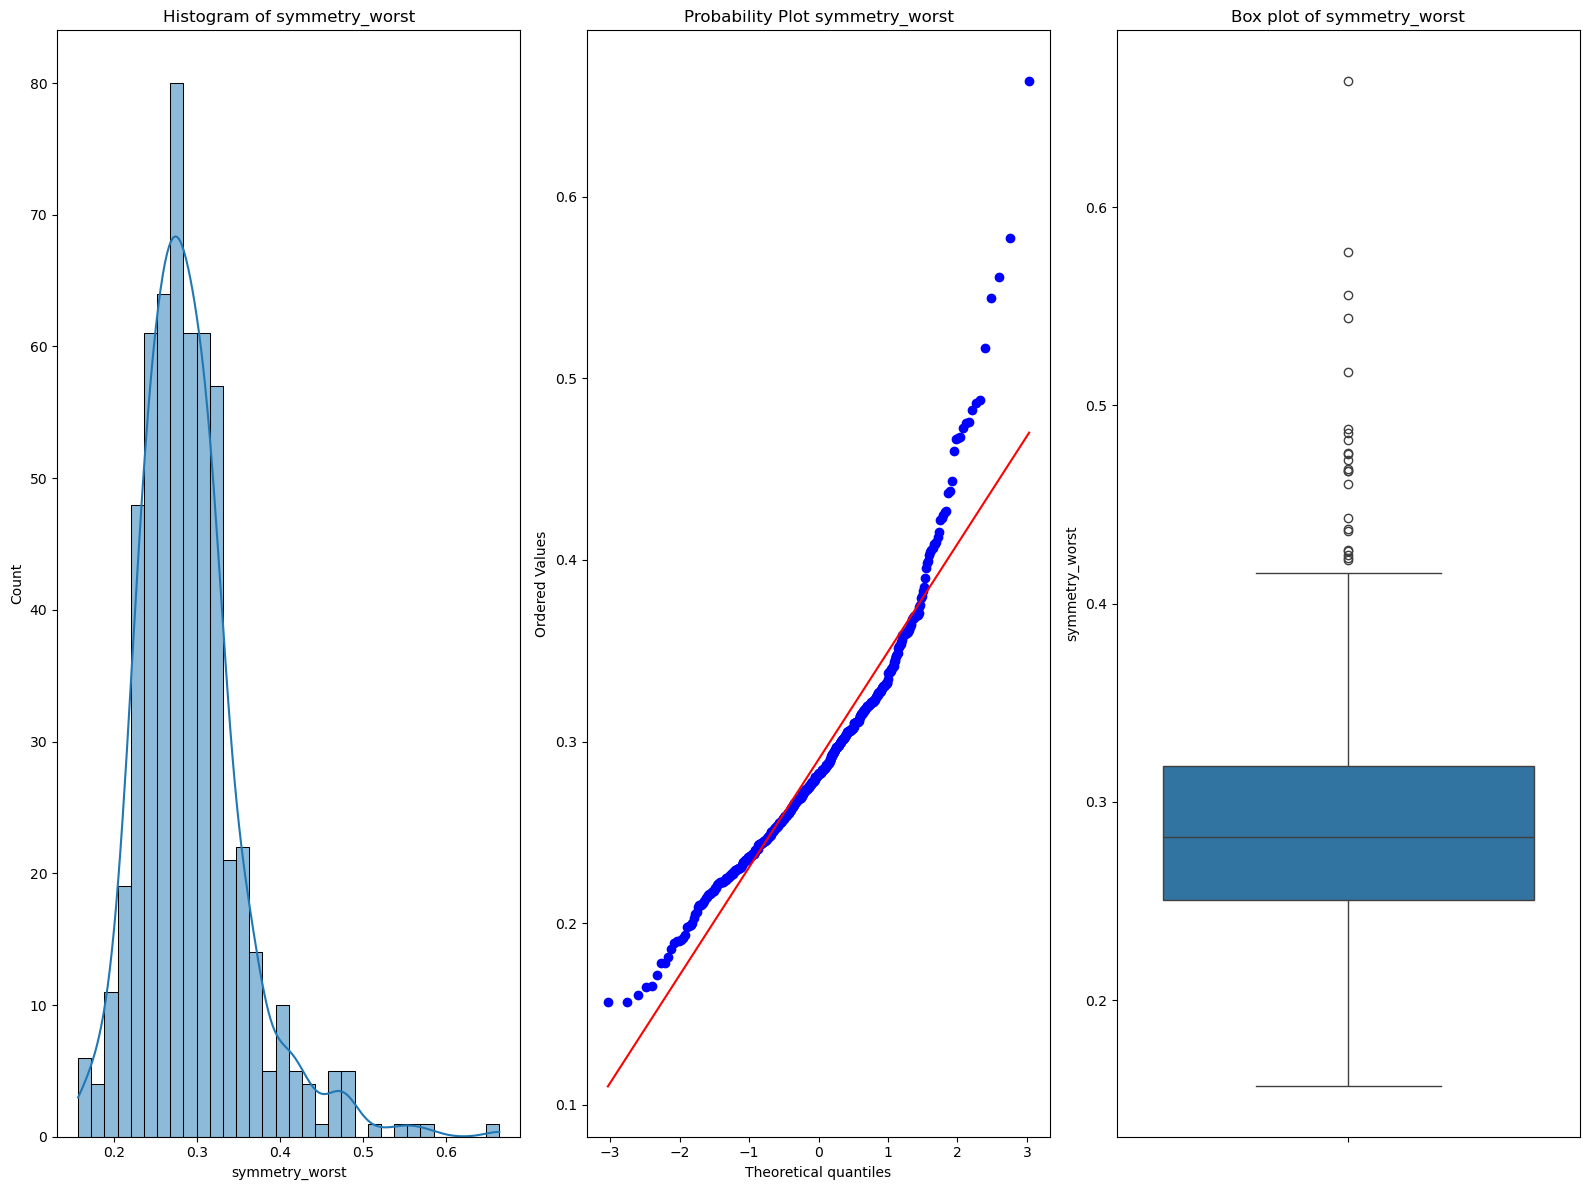

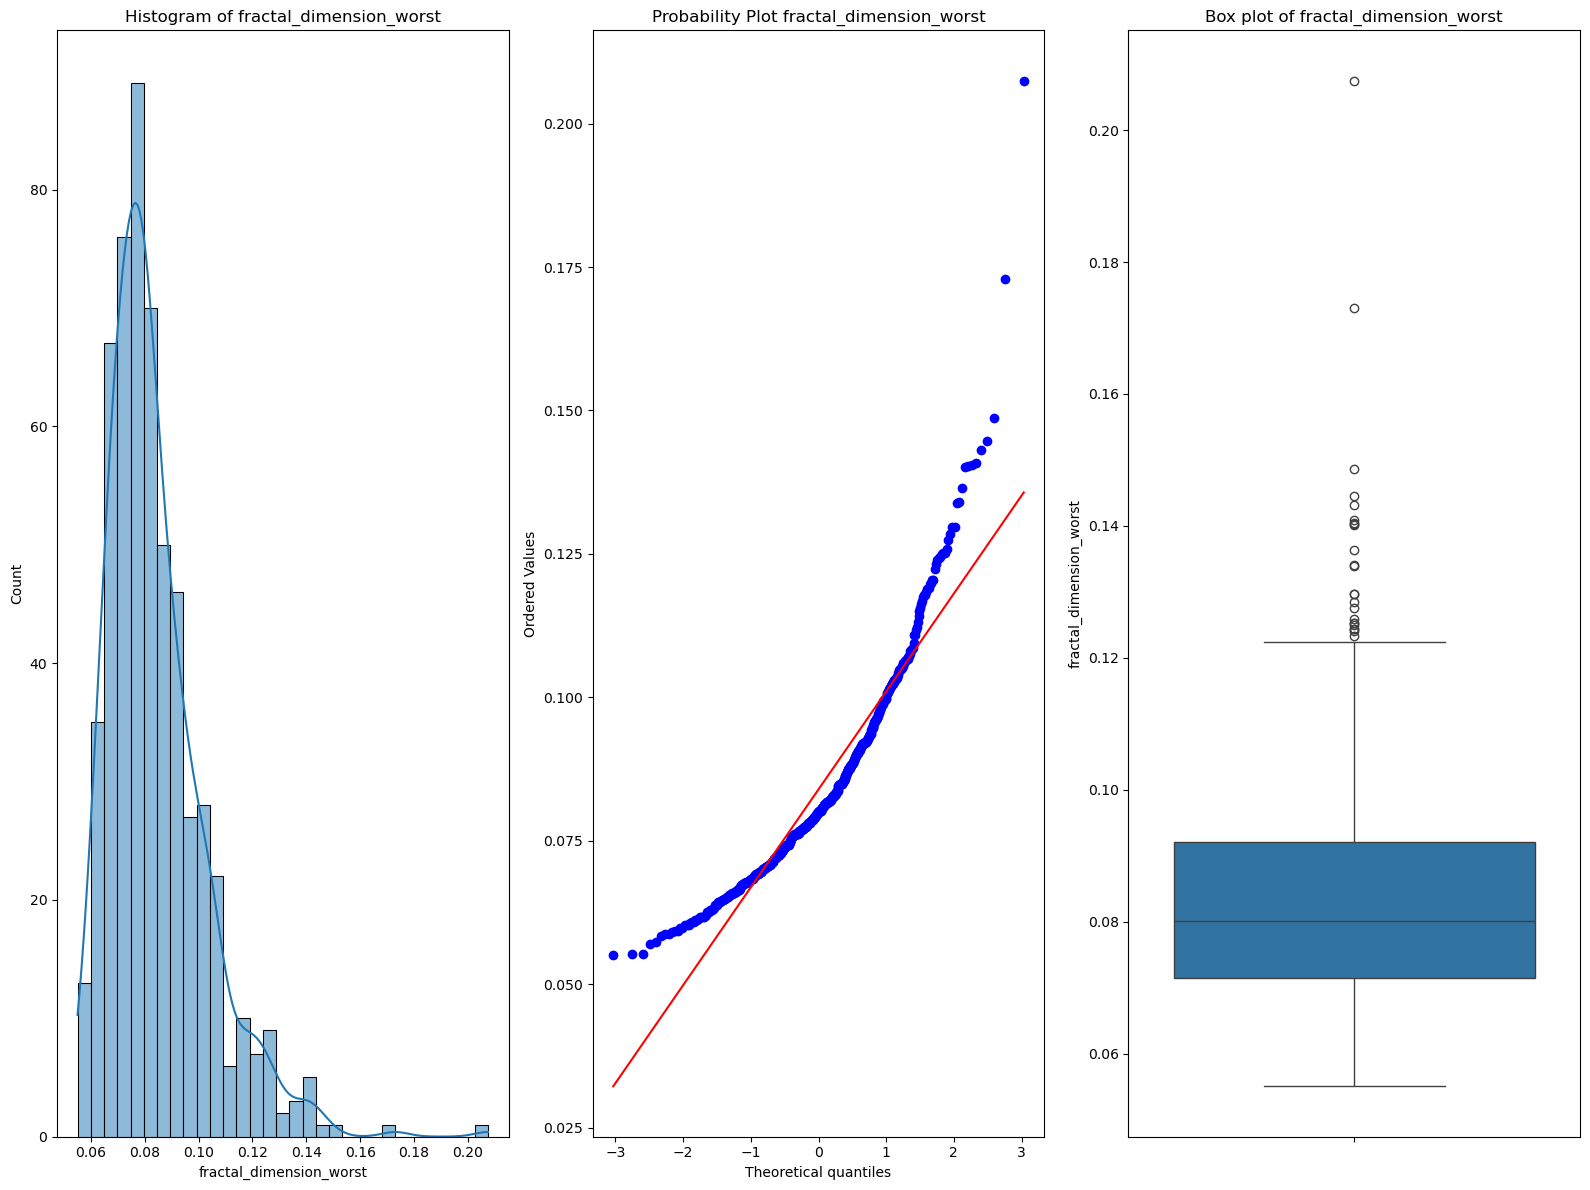

In [82]:
num_features = num_df.columns
univariate_analysis(num_df, num_features)

Some inital observations is that many of our features are skewed mildly/heavily to the right. As we all as many features containing outliers. 

So some things we could do here is apply transformations to normalize the distributions and handle outliers. Or use model based solutions like Random Forest or XGBoost which handles this for us.

Now lets move onto correlation heatmaps, which tells us how strongly pairs of numerical features relate to each other. Giving us more information in model selection

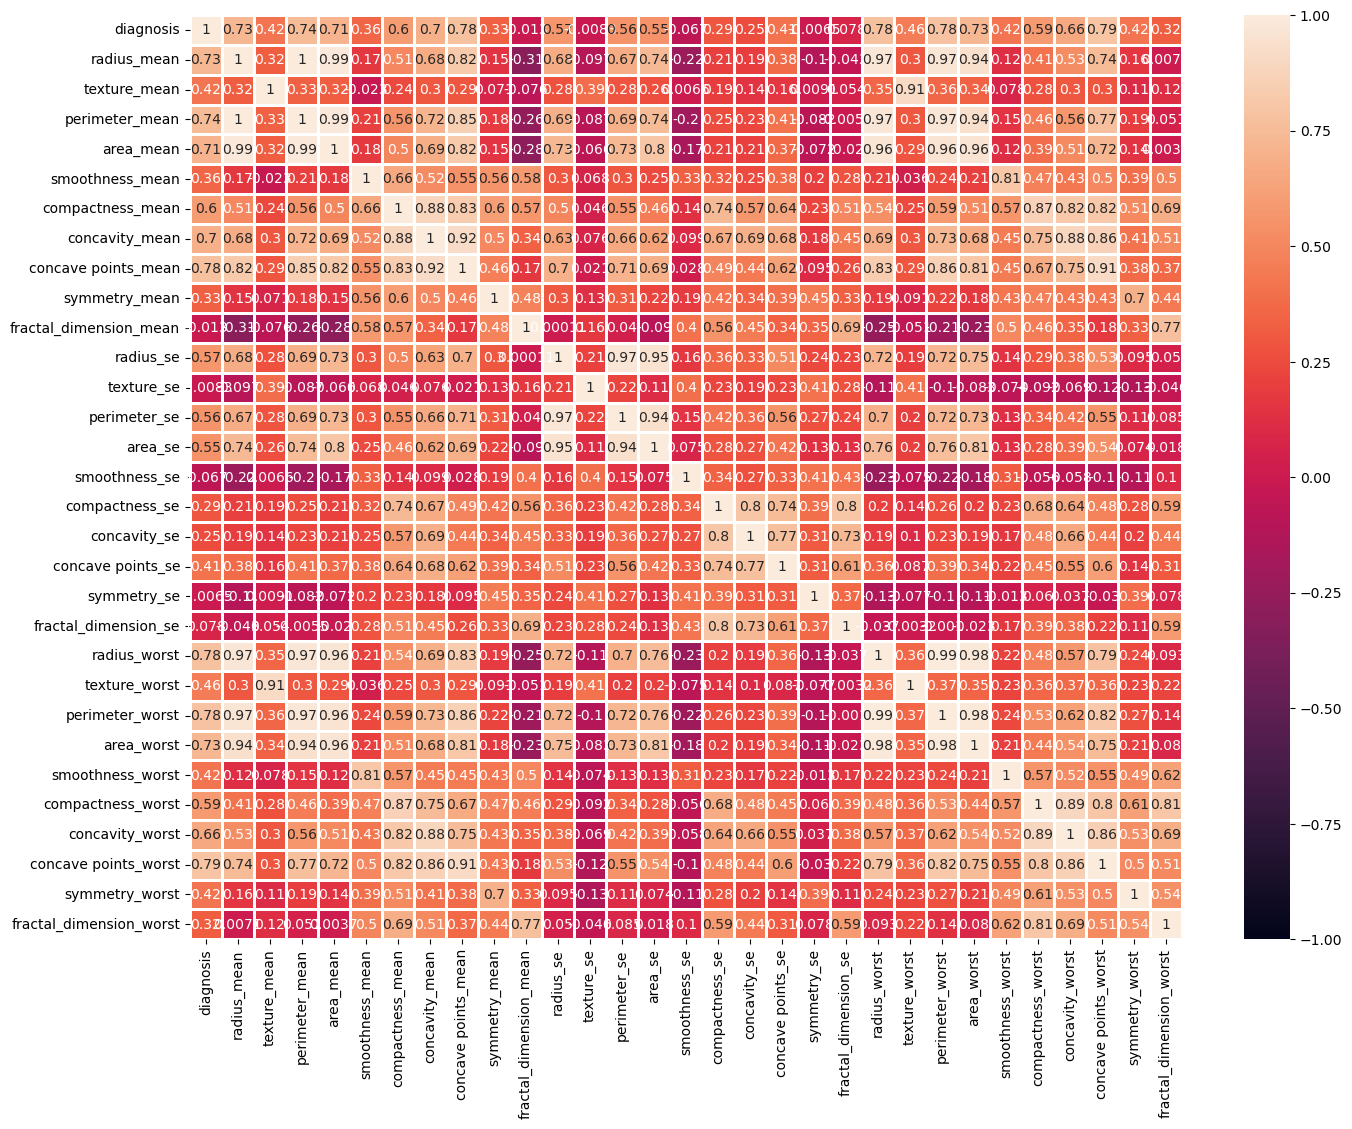

In [85]:
corr = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,vmin = -1, vmax = 1, linewidths=2)
plt.show()

In [88]:
def high_correlated_features(df, threshold=0.75):
    corr_matrix = df.corr().abs()
    highly_correlated = set()
    
    for col in corr_matrix.columns:
        correlated_features = corr_matrix[col][(corr_matrix[col] > threshold) & (corr_matrix.index != col)].index.tolist()
        if correlated_features:
            highly_correlated.add(col)
            highly_correlated.update(correlated_features)
    
    return list(highly_correlated)

high_correlated_features(df, threshold=0.75)


['concave points_se',
 'radius_worst',
 'texture_worst',
 'area_se',
 'concavity_mean',
 'radius_se',
 'compactness_mean',
 'area_worst',
 'compactness_worst',
 'concavity_se',
 'perimeter_worst',
 'fractal_dimension_worst',
 'area_mean',
 'texture_mean',
 'fractal_dimension_mean',
 'perimeter_mean',
 'concavity_worst',
 'perimeter_se',
 'compactness_se',
 'smoothness_mean',
 'radius_mean',
 'concave points_worst',
 'concave points_mean',
 'smoothness_worst',
 'diagnosis',
 'fractal_dimension_se']

So we have alot of features that carry very similiar information. Suggesting that a tree based model is best since it ignores redundant features

#### Feature Analysis

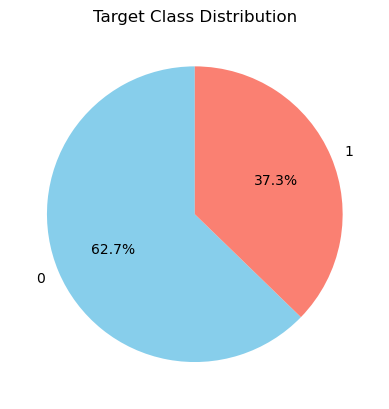

In [90]:
class_counts = df['diagnosis'].value_counts()

class_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Target Class Distribution')
plt.ylabel('')
plt.show()


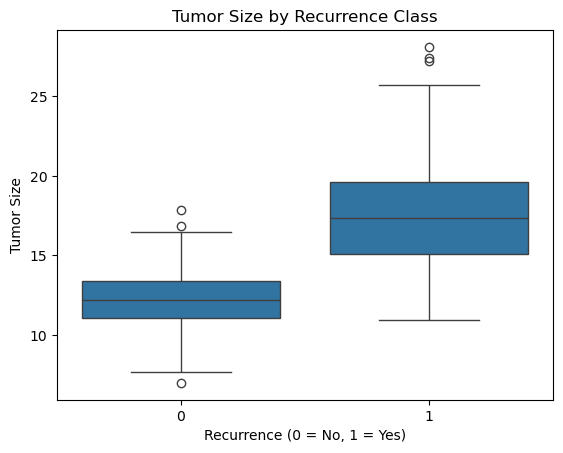

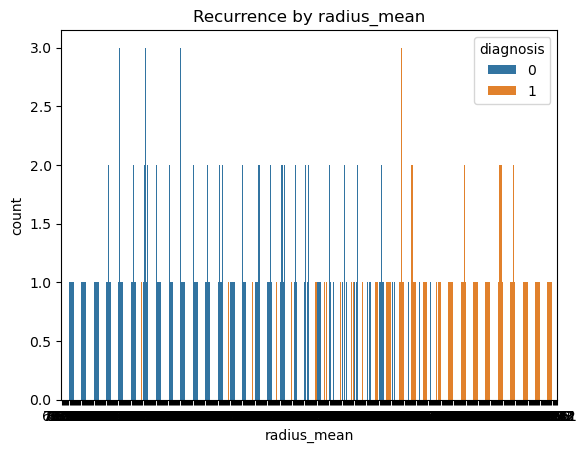

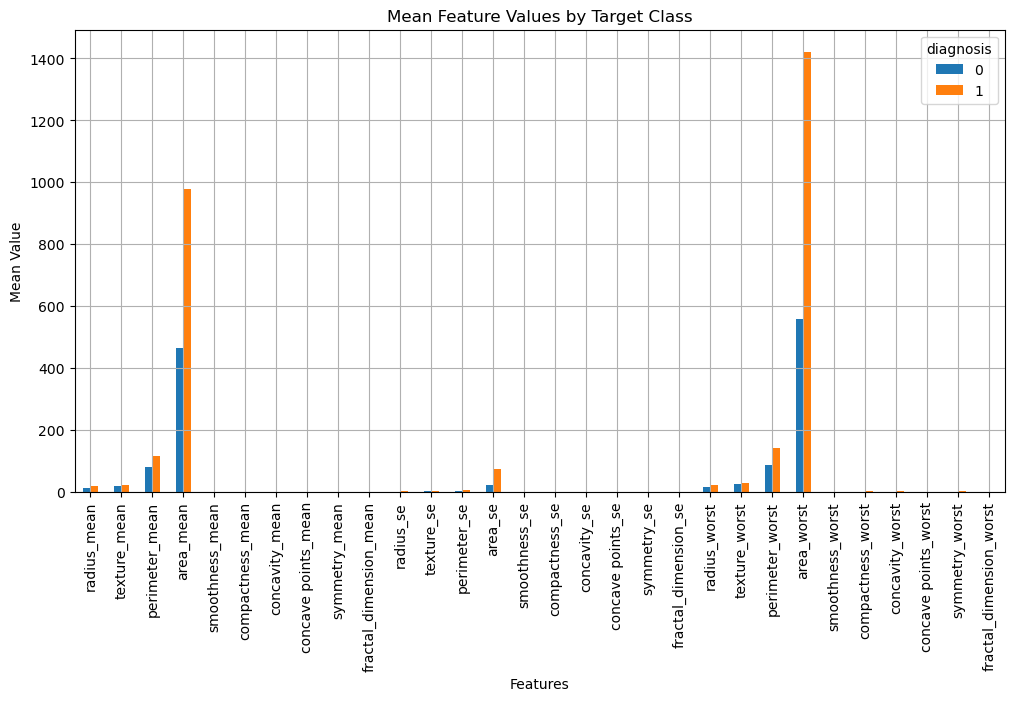

In [97]:
def target_analysis(df,target, feature):
    sns.boxplot(x = target,y=feature, data = df)
    plt.title('Tumor Size by Recurrence Class')
    plt.xlabel('Recurrence (0 = No, 1 = Yes)')
    plt.ylabel('Tumor Size')
    plt.show()

    sns.countplot(x=feature, hue=target, data=df)
    plt.title(f'Recurrence by {feature}')
    plt.show()

    df.groupby(target).mean().T.plot(kind='bar', figsize=(12,6))
    plt.title('Mean Feature Values by Target Class')
    plt.ylabel('Mean Value')
    plt.xlabel('Features')
    plt.grid(True)
    plt.show()

    


target_analysis(df,'diagnosis','radius_mean')

### Modeling

In [98]:
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

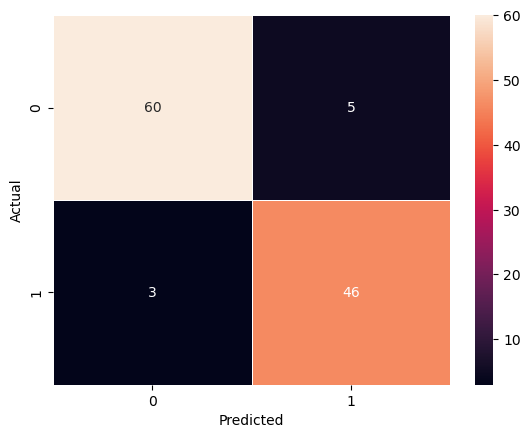

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        65
           1       0.90      0.94      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt = 'd',linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))



In [102]:
# Now lets compare test score against train score

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

score_train = rf.score(X_train,y_train)
score_test = rf.score(X_test,y_test)

print(f"Random Forest training score: {score_train}")
print(f"Random Forest test score: {score_test}")

Random Forest training score: 1.0
Random Forest test score: 0.9298245614035088


So we can see our model preforms well in both splits so no overfitting is happening
lets us GridSearchCV to tune the hyperparameters of the model

In [103]:
from sklearn.model_selection import GridSearchCV

params_rf = {
    'n_estimators': [100, 300],
    'max_features': ['sqrt'],   
    'max_depth': [5, 10],        
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [2, 5],  
    'criterion': ['gini']       
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params_rf,
    cv = 5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [104]:
print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best cross-validation accruacy: {grid_rf.best_score_}")

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accruacy: 0.9648351648351647


In [105]:
rf_best = RandomForestClassifier(**grid_rf.best_params_, random_state=42)

rf_best.fit(X_train, y_train)
score = rf_best.score(X_test,y_test)

print(f"Score of Random Forest with optimal parameters: {score}")

Score of Random Forest with optimal parameters: 0.9298245614035088


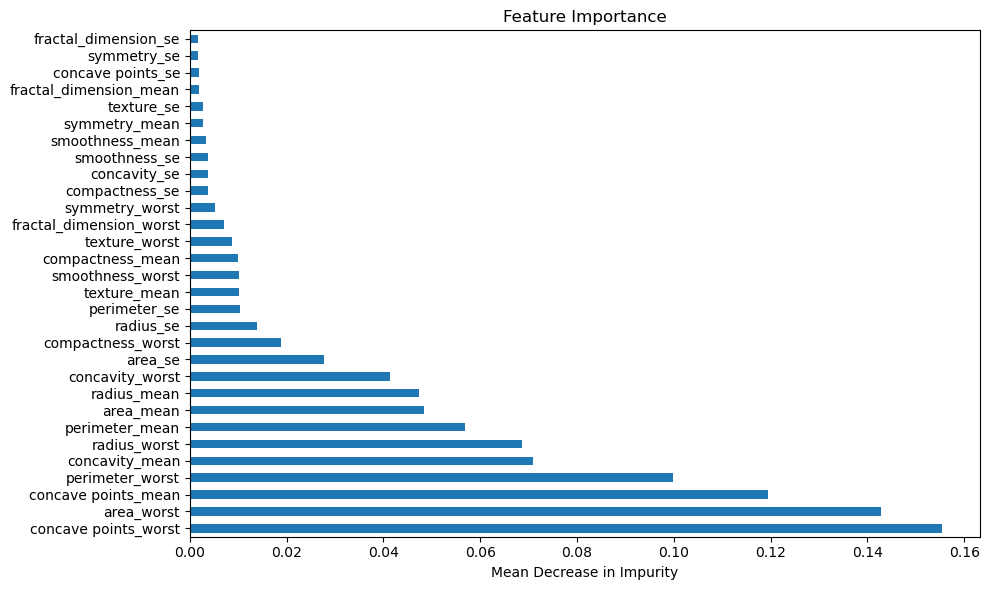

In [106]:
importance = rf_best.feature_importances_
features = X.columns

importance_df = pd.Series(importance, index=features).sort_values(ascending=False)

importance_df.plot(kind='barh', figsize=(10, 6), title='Feature Importance')
plt.xlabel("Mean Decrease in Impurity")
plt.tight_layout()
plt.show()